In [621]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Machine Learning 
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelBinarizer, PowerTransformer, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as Imbpipeline
from imblearn.over_sampling import SMOTE

In [622]:
pd.set_option('display.max_columns', 100)

In [623]:
df = pd.read_csv("house_prices.csv")
df.head()

Index                                              Title  \
0      0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1      1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2      2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3      3        1 BHK Ready to Occupy Flat for sale Kasheli   
4      4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   

                                         Description Amount(in rupees)  \
0  Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1  One can find this stunning 2 BHK flat for sale...           98 Lac    
2  Up for immediate sale is a 2 BHK apartment in ...          1.40 Cr    
3  This beautiful 1 BHK Flat is available for sal...           25 Lac    
4  This lovely 2 BHK Flat in Pokhran Road, Thane ...          1.60 Cr    

   Price (in rupees) location Carpet Area         Status         Floor  \
0            6000.00    thane    500 sqft  Ready to Move  10 out of 11   
1           13799.00    thane    473 sqft  Ready to Move   3 out of 22   
2           17500.00    thane    779 sqft  Ready to Move  10 out of 29   
3                NaN    thane    530 sqft  Ready to Move    1 out of 3   
4           18824.00    thane    635 sqft  Ready to Move  20 out of 42   

  Transaction      Furnishing facing             overlooking  \
0      Resale     Unfurnished    NaN                     NaN   
1      Resale  Semi-Furnished   East             Garden/Park   
2      Resale     Unfurnished   East             Garden/Park   
3      Resale     Unfurnished    NaN                     NaN   
4      Resale     Unfurnished   West  Garden/Park, Main Road   

                               Society Bathroom Balcony Car Parking  \
0  Srushti Siddhi Mangal Murti Complex        1       2         NaN   
1                          Dosti Vihar        2     NaN      1 Open   
2                 Sunrise by Kalpataru        2     NaN   1 Covered   
3                                  NaN        1       1         NaN   
4          TenX Habitat Raymond Realty        2     NaN   1 Covered   

              Ownership Super Area  Dimensions  Plot Area  
0                   NaN        NaN         NaN        NaN  
1              Freehold        NaN         NaN        NaN  
2              Freehold        NaN         NaN        NaN  
3                   NaN        NaN         NaN        NaN  
4  Co-operative Society        NaN         NaN        NaN

In [624]:
df.shape

(187531, 21)

In [625]:
df.isna().sum()

Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64

In [626]:
df.Ownership.unique()

array([nan, 'Freehold', 'Co-operative Society', 'Power Of Attorney',
       'Leasehold'], dtype=object)

In [627]:
df.drop(['Index', 'Description', 'overlooking', 'Ownership', 'Dimensions', 'Plot Area'],
       axis=1, inplace=True)
print(df.shape)
df.head()

(187531, 15)


Title Amount(in rupees)  \
0  1 BHK Ready to Occupy Flat for sale in Srushti...           42 Lac    
1  2 BHK Ready to Occupy Flat for sale in Dosti V...           98 Lac    
2  2 BHK Ready to Occupy Flat for sale in Sunrise...          1.40 Cr    
3        1 BHK Ready to Occupy Flat for sale Kasheli           25 Lac    
4  2 BHK Ready to Occupy Flat for sale in TenX Ha...          1.60 Cr    

   Price (in rupees) location Carpet Area         Status         Floor  \
0            6000.00    thane    500 sqft  Ready to Move  10 out of 11   
1           13799.00    thane    473 sqft  Ready to Move   3 out of 22   
2           17500.00    thane    779 sqft  Ready to Move  10 out of 29   
3                NaN    thane    530 sqft  Ready to Move    1 out of 3   
4           18824.00    thane    635 sqft  Ready to Move  20 out of 42   

  Transaction      Furnishing facing                              Society  \
0      Resale     Unfurnished    NaN  Srushti Siddhi Mangal Murti Complex   
1      Resale  Semi-Furnished   East                          Dosti Vihar   
2      Resale     Unfurnished   East                 Sunrise by Kalpataru   
3      Resale     Unfurnished    NaN                                  NaN   
4      Resale     Unfurnished   West          TenX Habitat Raymond Realty   

  Bathroom Balcony Car Parking Super Area  
0        1       2         NaN        NaN  
1        2     NaN      1 Open        NaN  
2        2     NaN   1 Covered        NaN  
3        1       1         NaN        NaN  
4        2     NaN   1 Covered        NaN

In [628]:
df.isna().sum()

Title                     0
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Super Area           107685
dtype: int64

In [629]:
df.dtypes

Title                 object
Amount(in rupees)     object
Price (in rupees)    float64
location              object
Carpet Area           object
Status                object
Floor                 object
Transaction           object
Furnishing            object
facing                object
Society               object
Bathroom              object
Balcony               object
Car Parking           object
Super Area            object
dtype: object

In [630]:
df.shape

(187531, 15)

In [631]:
df.dropna(subset=['Status', 'Transaction', 'Furnishing', 'Bathroom'], inplace=True)
df.shape

(183886, 15)

In [632]:
df.isna().sum()

Title                     0
Amount(in rupees)         0
Price (in rupees)     16714
location                  0
Carpet Area           77250
Status                    0
Floor                  6259
Transaction               0
Furnishing                0
facing                67148
Society              106414
Bathroom                  0
Balcony               46563
Car Parking           99941
Super Area           106738
dtype: int64

In [633]:
df['Price (in rupees)'].fillna(df['Price (in rupees)'].median(), inplace=True)
df.isna().sum()

Title                     0
Amount(in rupees)         0
Price (in rupees)         0
location                  0
Carpet Area           77250
Status                    0
Floor                  6259
Transaction               0
Furnishing                0
facing                67148
Society              106414
Bathroom                  0
Balcony               46563
Car Parking           99941
Super Area           106738
dtype: int64

### Carpet

In [634]:
def carpet_area_unit(x):
    if pd.isna(x):
        return x
    else:
        return x.split(" ")[1]

def carpet_area_size(x):
    if pd.isna(x):
        return x
    else:
        return int(x.split(" ")[0])

In [635]:
df['Carpet Area (size)'] = df['Carpet Area'].apply(carpet_area_size)
df['Carpet Area (unit)'] = df['Carpet Area'].apply(carpet_area_unit)

In [636]:
df['Carpet Area (unit)'].value_counts()

Carpet Area (unit)
sqft      100210
sqyrd       5525
sqm          891
marla          3
acre           2
kanal          2
ground         1
cent           1
bigha          1
Name: count, dtype: int64

In [637]:
df.shape

(183886, 17)

In [638]:
df.drop(df[(df['Carpet Area (unit)']=='marla')].index, axis=0, inplace=True)
df.drop(df[(df['Carpet Area (unit)']=='acre')].index, axis=0, inplace=True)
df.drop(df[(df['Carpet Area (unit)']=='kanal')].index, axis=0, inplace=True)
df.drop(df[(df['Carpet Area (unit)']=='ground')].index, axis=0, inplace=True)
df.drop(df[(df['Carpet Area (unit)']=='cent')].index, axis=0, inplace=True)
df.drop(df[(df['Carpet Area (unit)']=='bigha')].index, axis=0, inplace=True)

In [639]:
df.shape

(183876, 17)

In [640]:
def sqm_to_sqft(sqm):
    return sqm * 10.7639
def sqyrd_to_sqft(sqyrd):
    return sqyrd * 9

In [641]:
df[df['Carpet Area (unit)']=='sqyrd'].head()

Title Amount(in rupees)  \
2645         2 BHK Ready to Occupy Flat for sale Gota           45 Lac    
2663      2 BHK Ready to Occupy Flat for sale Rambagh           42 Lac    
2681    2 BHK Ready to Occupy Flat for sale Maninagar           34 Lac    
2695    2 BHK Ready to Occupy Flat for sale Maninagar           45 Lac    
2705  3 BHK Ready to Occupy Flat for sale Navrangpura             1 Cr    

      Price (in rupees)   location Carpet Area         Status       Floor  \
2645            4348.00  ahmedabad    77 sqyrd  Ready to Move  1 out of 5   
2663            4667.00  ahmedabad    85 sqyrd  Ready to Move  4 out of 4   
2681            3434.00  ahmedabad    90 sqyrd  Ready to Move  2 out of 4   
2695            4348.00  ahmedabad   100 sqyrd  Ready to Move  2 out of 4   
2705            6006.00  ahmedabad   165 sqyrd  Ready to Move  4 out of 5   

     Transaction      Furnishing facing Society Bathroom Balcony Car Parking  \
2645      Resale     Unfurnished   East     NaN        2       1      1 Open   
2663      Resale     Unfurnished   East     NaN        1       2         NaN   
2681      Resale  Semi-Furnished  North     NaN        1       1         NaN   
2695      Resale       Furnished   East     NaN        2       1      1 Open   
2705      Resale       Furnished    NaN     NaN        3       2         NaN   

     Super Area  Carpet Area (size) Carpet Area (unit)  
2645        NaN               77.00              sqyrd  
2663        NaN               85.00              sqyrd  
2681        NaN               90.00              sqyrd  
2695        NaN              100.00              sqyrd  
2705        NaN              165.00              sqyrd

In [642]:
df.loc[df['Carpet Area (unit)'] == 'sqyrd', 
       'Carpet Area (size)'] = df.loc[df['Carpet Area (unit)'] == 'sqyrd', 
                                      'Carpet Area (size)'].apply(sqyrd_to_sqft)

In [643]:
df[df['Carpet Area (unit)']=='sqyrd'].head()

Title Amount(in rupees)  \
2645         2 BHK Ready to Occupy Flat for sale Gota           45 Lac    
2663      2 BHK Ready to Occupy Flat for sale Rambagh           42 Lac    
2681    2 BHK Ready to Occupy Flat for sale Maninagar           34 Lac    
2695    2 BHK Ready to Occupy Flat for sale Maninagar           45 Lac    
2705  3 BHK Ready to Occupy Flat for sale Navrangpura             1 Cr    

      Price (in rupees)   location Carpet Area         Status       Floor  \
2645            4348.00  ahmedabad    77 sqyrd  Ready to Move  1 out of 5   
2663            4667.00  ahmedabad    85 sqyrd  Ready to Move  4 out of 4   
2681            3434.00  ahmedabad    90 sqyrd  Ready to Move  2 out of 4   
2695            4348.00  ahmedabad   100 sqyrd  Ready to Move  2 out of 4   
2705            6006.00  ahmedabad   165 sqyrd  Ready to Move  4 out of 5   

     Transaction      Furnishing facing Society Bathroom Balcony Car Parking  \
2645      Resale     Unfurnished   East     NaN        2       1      1 Open   
2663      Resale     Unfurnished   East     NaN        1       2         NaN   
2681      Resale  Semi-Furnished  North     NaN        1       1         NaN   
2695      Resale       Furnished   East     NaN        2       1      1 Open   
2705      Resale       Furnished    NaN     NaN        3       2         NaN   

     Super Area  Carpet Area (size) Carpet Area (unit)  
2645        NaN              693.00              sqyrd  
2663        NaN              765.00              sqyrd  
2681        NaN              810.00              sqyrd  
2695        NaN              900.00              sqyrd  
2705        NaN             1485.00              sqyrd

In [644]:
df.loc[df['Carpet Area (unit)'] == 'sqm', 
       'Carpet Area (size)'] = df.loc[df['Carpet Area (unit)'] == 'sqm', 
                                      'Carpet Area (size)'].apply(sqm_to_sqft)
df[df['Carpet Area (unit)']=='sqm'].head()

Title Amount(in rupees)  \
566   2 BHK Ready to Occupy Flat for sale in Runwal ...           50 Lac    
829   2 BHK Ready to Occupy Flat for sale in Amrut S...           40 Lac    
1034      1 BHK Ready to Occupy Flat for sale Kalamboli           34 Lac    
1101  3 BHK Ready to Occupy Flat for sale in The Pal...          3.45 Cr    
2295  1 BHK Ready to Occupy Flat for sale in Crystal...          1.50 Cr    

      Price (in rupees)     location Carpet Area         Status         Floor  \
566             6047.00        thane      49 sqm  Ready to Move   5 out of 19   
829             4132.00        thane    6363 sqm  Ready to Move    2 out of 7   
1034            7179.00  navi-mumbai      40 sqm  Ready to Move    3 out of 3   
1101           18649.00  navi-mumbai    1200 sqm  Ready to Move   5 out of 14   
2295            6047.00       mumbai      51 sqm  Ready to Move  21 out of 22   

     Transaction      Furnishing        facing        Society Bathroom  \
566       Resale     Unfurnished           NaN  Runwal MyCity        2   
829       Resale     Unfurnished          East   Amrut Siddhi        2   
1034      Resale     Unfurnished          West            NaN        1   
1101      Resale     Unfurnished  North - East      The Palms        3   
2295      Resale  Semi-Furnished           NaN  Crystal Armus        2   

     Balcony Car Parking Super Area  Carpet Area (size) Carpet Area (unit)  
566        1         NaN        NaN              527.43                sqm  
829        3         NaN        NaN            68490.70                sqm  
1034     NaN         NaN        NaN              430.56                sqm  
1101       3   2 Covered        NaN            12916.68                sqm  
2295     NaN         NaN        NaN              548.96                sqm

In [645]:
df['Carpet Area (unit)'] = df['Carpet Area (unit)'].apply(lambda x: 'sqft'
                                                          if x == 'sqyrd' or x == 'sqm' else x)
df['Carpet Area (unit)'].unique()

array(['sqft', nan], dtype=object)

In [646]:
df['Carpet Area (size)']

0         500.00
1         473.00
2         779.00
3         530.00
4         635.00
           ...  
187526       NaN
187527       NaN
187528   1250.00
187529       NaN
187530       NaN
Name: Carpet Area (size), Length: 183876, dtype: float64

In [647]:
from scipy.stats import shapiro
def check_distro(colname, df=df):
    price_data = df[colname].dropna()  
    stat, p_value = shapiro(price_data)
    print(f"Shapiro-Wilk Test: Statistics={stat:.4f}, p-value={p_value:.4f}")
    if p_value > 0.05:
        print("The data appears to be normally distributed (fail to reject H0).")
    else:
        print("The data does not appear to be normally distributed (reject H0).")
check_distro("Carpet Area (size)")

Shapiro-Wilk Test: Statistics=0.0803, p-value=0.0000
The data does not appear to be normally distributed (reject H0).


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.



In [648]:
df['Carpet Area (size)'].fillna(df['Carpet Area (size)'].median(), inplace=True)
df['Carpet Area (unit)'].fillna('sqft', inplace=True)

In [649]:
df['Carpet Area (size)'].isna().sum()

0

In [650]:
print(df['Carpet Area (unit)'].isna().sum())
df['Carpet Area (unit)'].unique()

0


array(['sqft'], dtype=object)

In [651]:
df.drop(['Carpet Area'], axis=1, inplace=True)

In [652]:
df.head()

Title Amount(in rupees)  \
0  1 BHK Ready to Occupy Flat for sale in Srushti...           42 Lac    
1  2 BHK Ready to Occupy Flat for sale in Dosti V...           98 Lac    
2  2 BHK Ready to Occupy Flat for sale in Sunrise...          1.40 Cr    
3        1 BHK Ready to Occupy Flat for sale Kasheli           25 Lac    
4  2 BHK Ready to Occupy Flat for sale in TenX Ha...          1.60 Cr    

   Price (in rupees) location         Status         Floor Transaction  \
0            6000.00    thane  Ready to Move  10 out of 11      Resale   
1           13799.00    thane  Ready to Move   3 out of 22      Resale   
2           17500.00    thane  Ready to Move  10 out of 29      Resale   
3            6047.00    thane  Ready to Move    1 out of 3      Resale   
4           18824.00    thane  Ready to Move  20 out of 42      Resale   

       Furnishing facing                              Society Bathroom  \
0     Unfurnished    NaN  Srushti Siddhi Mangal Murti Complex        1   
1  Semi-Furnished   East                          Dosti Vihar        2   
2     Unfurnished   East                 Sunrise by Kalpataru        2   
3     Unfurnished    NaN                                  NaN        1   
4     Unfurnished   West          TenX Habitat Raymond Realty        2   

  Balcony Car Parking Super Area  Carpet Area (size) Carpet Area (unit)  
0       2         NaN        NaN              500.00               sqft  
1     NaN      1 Open        NaN              473.00               sqft  
2     NaN   1 Covered        NaN              779.00               sqft  
3       1         NaN        NaN              530.00               sqft  
4     NaN   1 Covered        NaN              635.00               sqft

In [653]:
df.isna().sum()

Title                      0
Amount(in rupees)          0
Price (in rupees)          0
location                   0
Status                     0
Floor                   6259
Transaction                0
Furnishing                 0
facing                 67146
Society               106407
Bathroom                   0
Balcony                46563
Car Parking            99939
Super Area            106728
Carpet Area (size)         0
Carpet Area (unit)         0
dtype: int64

### Floor

In [654]:
df['Floor'].unique()

array(['10 out of 11', '3 out of 22', '10 out of 29', '1 out of 3',
       '20 out of 42', '2 out of 7', '4 out of 5', 'Ground out of 7',
       'Ground out of 2', '3 out of 27', '6 out of 20', '16 out of 24',
       '8 out of 20', '18 out of 27', '2 out of 3', '10 out of 16',
       '5 out of 7', '20 out of 28', '3 out of 3', '3 out of 7',
       '15 out of 31', '2 out of 28', '27 out of 27', '6 out of 7',
       '5 out of 5', '3 out of 8', '11 out of 17', '9 out of 24',
       '16 out of 27', '14 out of 29', '12 out of 27', '1 out of 27',
       '2 out of 4', '16 out of 38', '3 out of 4', '2 out of 17',
       '12 out of 28', '3 out of 19', '6 out of 28', '1 out of 4',
       '7 out of 16', '2 out of 2', '1 out of 9', '7 out of 12',
       '10 out of 10', '4 out of 4', '14 out of 17', '21 out of 27',
       '5 out of 8', '7 out of 30', '6 out of 18', '14 out of 28',
       '3 out of 5', '2 out of 24', '1 out of 8', '2 out of 16',
       '7 out of 7', '4 out of 28', '4 out of 26', '1 

In [655]:
df.shape

(183876, 16)

In [656]:
df[df['Floor']=='Upper Basement out of 9']

Title Amount(in rupees)  \
80      3 BHK Ready to Occupy Flat for sale in Hiranan...             2 Cr    
15679   2 BHK Ready to Occupy Flat for sale in Century...          1.16 Cr    
146648  3 BHK Ready to Occupy Flat for sale in Hiranan...             2 Cr    

        Price (in rupees)   location         Status                    Floor  \
80               11765.00      thane  Ready to Move  Upper Basement out of 9   
15679             8033.00  bangalore  Ready to Move  Upper Basement out of 9   
146648           11765.00      thane  Ready to Move  Upper Basement out of 9   

       Transaction      Furnishing facing                   Society Bathroom  \
80          Resale       Furnished    NaN  Hiranandani Estate Capri        3   
15679       Resale  Semi-Furnished    NaN                       NaN        2   
146648      Resale       Furnished    NaN  Hiranandani Estate Capri        3   

       Balcony Car Parking Super Area  Carpet Area (size) Carpet Area (unit)  
80           1         NaN        NaN             1200.00               sqft  
15679      NaN         NaN  1444 sqft             1065.00               sqft  
146648       1         NaN        NaN             1200.00               sqft

In [657]:
df['Floor'][80].split(" ")[3]

'of'

In [658]:
def get_total_floors(x):
    if pd.isna(x):
        return x
    else:
        if len(x.split(" ")) > 4:
            return int(x.split(" ")[4])
        elif len(x.split(" ")) == 4:
            return int(x.split(" ")[3])

In [659]:
df['Total floors'] = df['Floor'].apply(get_total_floors)
# df['Total floors'] = df['Total floors'].astype(int)

In [660]:
def get_floor(x):
    if pd.isna(x):
        return x
    else:
        return x.split(" ")[0]

In [661]:
df['Floor'] = df['Floor'].apply(get_floor)

In [662]:
df['Floor'].unique()

array(['10', '3', '1', '20', '2', '4', 'Ground', '6', '16', '8', '18',
       '5', '15', '27', '11', '9', '14', '12', '7', '21', 'Upper', nan,
       '29', '13', '19', '17', '28', '30', '23', '25', '26', '24', '22',
       '50', '32', '33', 'Lower', '40', '35', '42', '63', '38', '34',
       '60', '31', '37', '75', '70', '39', '44', '46', '36', '59', '45',
       '51', '200'], dtype=object)

In [663]:
df.loc[df['Floor'] == 'Ground', 'Floor'] = 0
df.loc[df['Floor'] == 'Upper', 'Floor'] = -1
df.loc[df['Floor'] == 'Lower', 'Floor'] = -2

In [664]:
print(df['Floor'].dtypes)
df['Floor'].unique()

object


array(['10', '3', '1', '20', '2', '4', 0, '6', '16', '8', '18', '5', '15',
       '27', '11', '9', '14', '12', '7', '21', -1, nan, '29', '13', '19',
       '17', '28', '30', '23', '25', '26', '24', '22', '50', '32', '33',
       -2, '40', '35', '42', '63', '38', '34', '60', '31', '37', '75',
       '70', '39', '44', '46', '36', '59', '45', '51', '200'],
      dtype=object)

In [665]:
# df['Floor'] = df['Floor'].apply(lambda x: x if pd.isna(x) else int(x))
# df['Floor'] = df['Floor'].astype('Int64')
df['Floor'] = pd.to_numeric(df['Floor'], errors='coerce')
df['Floor'].fillna(df['Floor'].median(), inplace=True)
df['Total floors'].fillna(df['Total floors'].median(), inplace=True)
df['Floor'] = df['Floor'].astype('Int64')
df['Total floors'] = df['Total floors'].astype('Int64')
print(df['Floor'].dtypes)
df['Floor'].unique()

Int64


<IntegerArray>
[ 10,   3,   1,  20,   2,   4,   0,   6,  16,   8,  18,   5,  15,  27,  11,
   9,  14,  12,   7,  21,  -1,  29,  13,  19,  17,  28,  30,  23,  25,  26,
  24,  22,  50,  32,  33,  -2,  40,  35,  42,  63,  38,  34,  60,  31,  37,
  75,  70,  39,  44,  46,  36,  59,  45,  51, 200]
Length: 55, dtype: Int64

In [666]:
print(df.isna().sum())

Title                      0
Amount(in rupees)          0
Price (in rupees)          0
location                   0
Status                     0
Floor                      0
Transaction                0
Furnishing                 0
facing                 67146
Society               106407
Bathroom                   0
Balcony                46563
Car Parking            99939
Super Area            106728
Carpet Area (size)         0
Carpet Area (unit)         0
Total floors               0
dtype: int64


In [667]:
df.shape

(183876, 17)

In [668]:
df.dtypes

Title                  object
Amount(in rupees)      object
Price (in rupees)     float64
location               object
Status                 object
Floor                   Int64
Transaction            object
Furnishing             object
facing                 object
Society                object
Bathroom               object
Balcony                object
Car Parking            object
Super Area             object
Carpet Area (size)    float64
Carpet Area (unit)     object
Total floors            Int64
dtype: object

In [669]:
df.drop(df[df['Floor'] > df['Total floors']].index, inplace=True)
df.shape

(183866, 17)

In [670]:
df[df['Floor'] > df['Total floors']]

Empty DataFrame
Columns: [Title, Amount(in rupees), Price (in rupees), location, Status, Floor, Transaction, Furnishing, facing, Society, Bathroom, Balcony, Car Parking, Super Area, Carpet Area (size), Carpet Area (unit), Total floors]
Index: []

In [671]:
df.head()

Title Amount(in rupees)  \
0  1 BHK Ready to Occupy Flat for sale in Srushti...           42 Lac    
1  2 BHK Ready to Occupy Flat for sale in Dosti V...           98 Lac    
2  2 BHK Ready to Occupy Flat for sale in Sunrise...          1.40 Cr    
3        1 BHK Ready to Occupy Flat for sale Kasheli           25 Lac    
4  2 BHK Ready to Occupy Flat for sale in TenX Ha...          1.60 Cr    

   Price (in rupees) location         Status  Floor Transaction  \
0            6000.00    thane  Ready to Move     10      Resale   
1           13799.00    thane  Ready to Move      3      Resale   
2           17500.00    thane  Ready to Move     10      Resale   
3            6047.00    thane  Ready to Move      1      Resale   
4           18824.00    thane  Ready to Move     20      Resale   

       Furnishing facing                              Society Bathroom  \
0     Unfurnished    NaN  Srushti Siddhi Mangal Murti Complex        1   
1  Semi-Furnished   East                          Dosti Vihar        2   
2     Unfurnished   East                 Sunrise by Kalpataru        2   
3     Unfurnished    NaN                                  NaN        1   
4     Unfurnished   West          TenX Habitat Raymond Realty        2   

  Balcony Car Parking Super Area  Carpet Area (size) Carpet Area (unit)  \
0       2         NaN        NaN              500.00               sqft   
1     NaN      1 Open        NaN              473.00               sqft   
2     NaN   1 Covered        NaN              779.00               sqft   
3       1         NaN        NaN              530.00               sqft   
4     NaN   1 Covered        NaN              635.00               sqft   

   Total floors  
0            11  
1            22  
2            29  
3             3  
4            42

### Amount

In [672]:
df['Amount(in rupees)'] = df['Amount(in rupees)'].str.strip()

In [673]:
df['Amount(in rupees)'].unique()

array(['42 Lac', '98 Lac', '1.40 Cr', ..., '1.5 Lac', '24.4 Lac',
       '9.90 Cr'], dtype=object)

In [674]:
df['Amount(in rupees)'][0].split(" ")

['42', 'Lac']

In [675]:
df['Amount (unit)'] = df['Amount(in rupees)'].apply(lambda x: x.split(" ")[1])

In [676]:
df

Title Amount(in rupees)  \
0       1 BHK Ready to Occupy Flat for sale in Srushti...            42 Lac   
1       2 BHK Ready to Occupy Flat for sale in Dosti V...            98 Lac   
2       2 BHK Ready to Occupy Flat for sale in Sunrise...           1.40 Cr   
3             1 BHK Ready to Occupy Flat for sale Kasheli            25 Lac   
4       2 BHK Ready to Occupy Flat for sale in TenX Ha...           1.60 Cr   
...                                                   ...               ...   
187526  3 BHK Ready to Occupy Flat for sale in Bollywo...            63 Lac   
187527  3 BHK Ready to Occupy Flat for sale in Sushma ...            55 Lac   
187528  3 BHK Ready to Occupy Flat for sale in Bollywo...            76 Lac   
187529  2 BHK Ready to Occupy Flat for sale in Friends...            30 Lac   
187530  3 BHK Ready to Occupy Flat for sale in Affinit...           1.18 Cr   

        Price (in rupees)  location         Status  Floor   Transaction  \
0                 6000.00     thane  Ready to Move     10        Resale   
1                13799.00     thane  Ready to Move      3        Resale   
2                17500.00     thane  Ready to Move     10        Resale   
3                 6047.00     thane  Ready to Move      1        Resale   
4                18824.00     thane  Ready to Move     20        Resale   
...                   ...       ...            ...    ...           ...   
187526            3225.00  zirakpur  Ready to Move      2  New Property   
187527            3274.00  zirakpur  Ready to Move      4        Resale   
187528            4343.00  zirakpur  Ready to Move      1        Resale   
187529            4231.00  zirakpur  Ready to Move      2        Resale   
187530            6162.00  zirakpur  Ready to Move      5        Resale   

            Furnishing        facing                              Society  \
0          Unfurnished           NaN  Srushti Siddhi Mangal Murti Complex   
1       Semi-Furnished          East                          Dosti Vihar   
2          Unfurnished          East                 Sunrise by Kalpataru   
3          Unfurnished           NaN                                  NaN   
4          Unfurnished          West          TenX Habitat Raymond Realty   
...                ...           ...                                  ...   
187526  Semi-Furnished          East                    Bollywood Esencia   
187527     Unfurnished  North - East                   Sushma Urban Views   
187528       Furnished          East                    Bollywood Esencia   
187529  Semi-Furnished           NaN                      Friends Enclave   
187530  Semi-Furnished  North - East                      Affinity Greens   

       Bathroom Balcony Car Parking Super Area  Carpet Area (size)  \
0             1       2         NaN        NaN              500.00   
1             2     NaN      1 Open        NaN              473.00   
2             2     NaN   1 Covered        NaN              779.00   
3             1       1         NaN        NaN              530.00   
4             2     NaN   1 Covered        NaN              635.00   
...         ...     ...         ...        ...                 ...   
187526        3       3   1 Covered  1953 sqft             1065.00   
187527        3     NaN   1 Covered  1680 sqft             1065.00   
187528        3       2  1 Covered,        NaN             1250.00   
187529        2     NaN         NaN   709 sqft             1065.00   
187530        4       4   1 Covered  1915 sqft             1065.00   

       Carpet Area (unit)  Total floors Amount (unit)  
0                    sqft            11           Lac  
1                    sqft            22           Lac  
2                    sqft            29            Cr  
3                    sqft             3           Lac  
4                    sqft            42            Cr  
...                   ...           ...           ...  
187526               sqft             4     

In [677]:
df['Amount (unit)'].unique()

array(['Lac', 'Cr', 'for'], dtype=object)

In [678]:
df.drop(df[df['Amount (unit)']=="for"].index, axis=0, inplace=True)
df.shape

(175065, 18)

In [679]:
df['Amount (unit)'].unique()

array(['Lac', 'Cr'], dtype=object)

In [680]:
df['Amount (lakh)'] = df['Amount(in rupees)'].apply(lambda x: x.split(" ")[0])
df['Amount (lakh)'] = df['Amount (lakh)'].astype(float)
df

Title Amount(in rupees)  \
0       1 BHK Ready to Occupy Flat for sale in Srushti...            42 Lac   
1       2 BHK Ready to Occupy Flat for sale in Dosti V...            98 Lac   
2       2 BHK Ready to Occupy Flat for sale in Sunrise...           1.40 Cr   
3             1 BHK Ready to Occupy Flat for sale Kasheli            25 Lac   
4       2 BHK Ready to Occupy Flat for sale in TenX Ha...           1.60 Cr   
...                                                   ...               ...   
187526  3 BHK Ready to Occupy Flat for sale in Bollywo...            63 Lac   
187527  3 BHK Ready to Occupy Flat for sale in Sushma ...            55 Lac   
187528  3 BHK Ready to Occupy Flat for sale in Bollywo...            76 Lac   
187529  2 BHK Ready to Occupy Flat for sale in Friends...            30 Lac   
187530  3 BHK Ready to Occupy Flat for sale in Affinit...           1.18 Cr   

        Price (in rupees)  location         Status  Floor   Transaction  \
0                 6000.00     thane  Ready to Move     10        Resale   
1                13799.00     thane  Ready to Move      3        Resale   
2                17500.00     thane  Ready to Move     10        Resale   
3                 6047.00     thane  Ready to Move      1        Resale   
4                18824.00     thane  Ready to Move     20        Resale   
...                   ...       ...            ...    ...           ...   
187526            3225.00  zirakpur  Ready to Move      2  New Property   
187527            3274.00  zirakpur  Ready to Move      4        Resale   
187528            4343.00  zirakpur  Ready to Move      1        Resale   
187529            4231.00  zirakpur  Ready to Move      2        Resale   
187530            6162.00  zirakpur  Ready to Move      5        Resale   

            Furnishing        facing                              Society  \
0          Unfurnished           NaN  Srushti Siddhi Mangal Murti Complex   
1       Semi-Furnished          East                          Dosti Vihar   
2          Unfurnished          East                 Sunrise by Kalpataru   
3          Unfurnished           NaN                                  NaN   
4          Unfurnished          West          TenX Habitat Raymond Realty   
...                ...           ...                                  ...   
187526  Semi-Furnished          East                    Bollywood Esencia   
187527     Unfurnished  North - East                   Sushma Urban Views   
187528       Furnished          East                    Bollywood Esencia   
187529  Semi-Furnished           NaN                      Friends Enclave   
187530  Semi-Furnished  North - East                      Affinity Greens   

       Bathroom Balcony Car Parking Super Area  Carpet Area (size)  \
0             1       2         NaN        NaN              500.00   
1             2     NaN      1 Open        NaN              473.00   
2             2     NaN   1 Covered        NaN              779.00   
3             1       1         NaN        NaN              530.00   
4             2     NaN   1 Covered        NaN              635.00   
...         ...     ...         ...        ...                 ...   
187526        3       3   1 Covered  1953 sqft             1065.00   
187527        3     NaN   1 Covered  1680 sqft             1065.00   
187528        3       2  1 Covered,        NaN             1250.00   
187529        2     NaN         NaN   709 sqft             1065.00   
187530        4       4   1 Covered  1915 sqft             1065.00   

       Carpet Area (unit)  Total floors Amount (unit)  Amount (lakh)  
0                    sqft            11           Lac          42.00  
1                    sqft            22           Lac          98.00  
2                    sqft            29            Cr           1.40  
3                    sqft             3           Lac          25.00  
4                    sqft            42            Cr           1.60  
...       

In [681]:
df[df['Amount (unit)']=='Cr'].head()

Title Amount(in rupees)  \
2   2 BHK Ready to Occupy Flat for sale in Sunrise...           1.40 Cr   
4   2 BHK Ready to Occupy Flat for sale in TenX Ha...           1.60 Cr   
9   3 BHK Ready to Occupy Flat for sale in Pride P...           1.60 Cr   
10  3 BHK Ready to Occupy Flat for sale in Cosmos ...           1.40 Cr   
11  2 BHK Ready to Occupy Flat for sale in Regency...           1.36 Cr   

    Price (in rupees) location         Status  Floor Transaction  \
2            17500.00    thane  Ready to Move     10      Resale   
4            18824.00    thane  Ready to Move     20      Resale   
9            11150.00    thane  Ready to Move      3      Resale   
10           12174.00    thane  Ready to Move      6      Resale   
11           11674.00    thane  Ready to Move     16      Resale   

        Furnishing facing                      Society Bathroom Balcony  \
2      Unfurnished   East         Sunrise by Kalpataru        2     NaN   
4      Unfurnished   West  TenX Habitat Raymond Realty        2     NaN   
9      Unfurnished   East                  Pride Palms        3       1   
10  Semi-Furnished    NaN                Cosmos Lounge        2     NaN   
11  Semi-Furnished    NaN              Regency Heights        2     NaN   

   Car Parking Super Area  Carpet Area (size) Carpet Area (unit)  \
2    1 Covered        NaN              779.00               sqft   
4    1 Covered        NaN              635.00               sqft   
9    1 Covered        NaN              900.00               sqft   
10      1 Open        NaN              950.00               sqft   
11         NaN  1165 sqft             1065.00               sqft   

    Total floors Amount (unit)  Amount (lakh)  
2             29            Cr           1.40  
4             42            Cr           1.60  
9             27            Cr           1.60  
10            20            Cr           1.40  
11            24            Cr           1.36

In [682]:
df['Amount (lakh)'] = df.apply(lambda row: row['Amount (lakh)'] * 100 if row['Amount (unit)'] == 'Cr' else row['Amount (lakh)'], axis=1)

In [683]:
df['Amount (crore)'] = df['Amount (lakh)'].apply(lambda x: x / 100)

In [684]:
df.drop(['Amount(in rupees)'], axis=1, inplace=True)
df.head()

Title  Price (in rupees)  \
0  1 BHK Ready to Occupy Flat for sale in Srushti...            6000.00   
1  2 BHK Ready to Occupy Flat for sale in Dosti V...           13799.00   
2  2 BHK Ready to Occupy Flat for sale in Sunrise...           17500.00   
3        1 BHK Ready to Occupy Flat for sale Kasheli            6047.00   
4  2 BHK Ready to Occupy Flat for sale in TenX Ha...           18824.00   

  location         Status  Floor Transaction      Furnishing facing  \
0    thane  Ready to Move     10      Resale     Unfurnished    NaN   
1    thane  Ready to Move      3      Resale  Semi-Furnished   East   
2    thane  Ready to Move     10      Resale     Unfurnished   East   
3    thane  Ready to Move      1      Resale     Unfurnished    NaN   
4    thane  Ready to Move     20      Resale     Unfurnished   West   

                               Society Bathroom Balcony Car Parking  \
0  Srushti Siddhi Mangal Murti Complex        1       2         NaN   
1                          Dosti Vihar        2     NaN      1 Open   
2                 Sunrise by Kalpataru        2     NaN   1 Covered   
3                                  NaN        1       1         NaN   
4          TenX Habitat Raymond Realty        2     NaN   1 Covered   

  Super Area  Carpet Area (size) Carpet Area (unit)  Total floors  \
0        NaN              500.00               sqft            11   
1        NaN              473.00               sqft            22   
2        NaN              779.00               sqft            29   
3        NaN              530.00               sqft             3   
4        NaN              635.00               sqft            42   

  Amount (unit)  Amount (lakh)  Amount (crore)  
0           Lac          42.00            0.42  
1           Lac          98.00            0.98  
2            Cr         140.00            1.40  
3           Lac          25.00            0.25  
4            Cr         160.00            1.60

### Location

In [685]:
df['location'] = df['location'].str.strip()
df['location'].unique()

array(['thane', 'navi-mumbai', 'nagpur', 'mumbai', 'ahmedabad',
       'bangalore', 'chennai', 'gurgaon', 'hyderabad', 'indore', 'jaipur',
       'kolkata', 'lucknow', 'new-delhi', 'noida', 'pune', 'agra',
       'ahmadnagar', 'allahabad', 'aurangabad', 'badlapur', 'belgaum',
       'bhiwadi', 'bhiwandi', 'bhopal', 'bhubaneswar', 'chandigarh',
       'coimbatore', 'dehradun', 'durgapur', 'ernakulam', 'faridabad',
       'ghaziabad', 'goa', 'greater-noida', 'guntur', 'guwahati',
       'gwalior', 'haridwar', 'jabalpur', 'jamshedpur', 'jodhpur',
       'kalyan', 'kanpur', 'kochi', 'kozhikode', 'ludhiana', 'madurai',
       'mangalore', 'mohali', 'mysore', 'nashik', 'navsari', 'nellore',
       'palakkad', 'palghar', 'panchkula', 'patna', 'pondicherry',
       'raipur', 'rajahmundry', 'ranchi', 'satara', 'shimla', 'siliguri',
       'solapur', 'sonipat', 'surat', 'thrissur', 'tirupati', 'trichy',
       'trivandrum', 'udaipur', 'udupi', 'vadodara', 'vapi', 'varanasi',
       'vijayawada',

In [686]:
df['location'].value_counts()

location
new-delhi      24896
bangalore      23035
kolkata        21545
gurgaon        18823
ahmedabad      12589
               ...  
navsari           29
palakkad          29
nellore           28
pondicherry       28
madurai           22
Name: count, Length: 81, dtype: int64

In [687]:
df['location'].value_counts()[df['location'].value_counts() <= 100]

location
tirupati       88
bhiwandi       87
rajahmundry    87
belgaum        59
vrindavan      59
jodhpur        59
udupi          59
shimla         57
kozhikode      57
satara         57
ahmadnagar     30
solapur        30
navsari        29
palakkad       29
nellore        28
pondicherry    28
madurai        22
Name: count, dtype: int64

### Status

In [688]:
df.shape

(175065, 19)

In [689]:
df['Status'].unique()

array(['Ready to Move'], dtype=object)

In [690]:
df.drop(['Status'], axis=1, inplace=True)
df.shape

(175065, 18)

### Transaction

In [691]:
df['Transaction'].unique()

array(['Resale', 'New Property', 'Other'], dtype=object)

In [692]:
df['Transaction'].value_counts()

Transaction
Resale          133056
New Property     41306
Other              703
Name: count, dtype: int64

### Furnishing

In [693]:
df['Furnishing'].isna().sum()

0

In [694]:
df['Furnishing'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

### facing

In [695]:
df['facing'].unique()

array([nan, 'East', 'West', 'North - East', 'North', 'North - West',
       'South', 'South -West', 'South - East'], dtype=object)

In [696]:
df.loc[df['facing']=='South -West', 'facing'] = 'South - West'

In [697]:
df['facing'].unique()

array([nan, 'East', 'West', 'North - East', 'North', 'North - West',
       'South', 'South - West', 'South - East'], dtype=object)

In [698]:
df['facing'].isna().sum()

63479

In [699]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df['facing'] = imputer.fit_transform(df[['facing']]).flatten()

In [700]:
df['facing'].isna().sum()

0

### Society

In [701]:
df['Society'].isna().sum()

100488

In [702]:
df.shape

(175065, 18)

In [703]:
df['Society'].unique()

array(['Srushti Siddhi Mangal Murti Complex', 'Dosti Vihar',
       'Sunrise by Kalpataru', ..., 'Nirmaan Royale Empire',
       'Savitry Enclave', 'Jaivee Radha Enclave'], dtype=object)

In [704]:
len(df['Society'].unique())

9984

In [705]:
df['Society'].value_counts()

Society
Hamdam Apartment               1648
Malibu Town                    1158
Shree Vardhman Victoria        1154
DLF Skycourt                   1153
Nebula Tower                    982
                               ... 
Venkatesh Lake Orchid             1
Brahma Emerald County             1
Raga Homes                        1
Saikrupa Vishwakalyan Nagri       1
Jaivee Radha Enclave              1
Name: count, Length: 9983, dtype: int64

In [706]:
society_lessthan_50 = df['Society'].value_counts()[df['Society'].value_counts()<=50]
society_lessthan_50

Society
Steel Strips Towers            50
Kingsbury Apartments           49
Bptp Eden Estate Sector 81     49
Ushay Towers                   49
Arihant Ambar                  47
                               ..
Venkatesh Lake Orchid           1
Brahma Emerald County           1
Raga Homes                      1
Saikrupa Vishwakalyan Nagri     1
Jaivee Radha Enclave            1
Name: count, Length: 9868, dtype: int64

In [707]:
9983 - 9868

115

In [708]:
df['Society'] = df['Society'].apply(lambda x: 'other' if x in society_lessthan_50 else x)

In [709]:
len(df['Society'].unique())

117

In [710]:
df['Society'].value_counts()

Society
other                      27318
Hamdam Apartment            1648
Malibu Town                 1158
Shree Vardhman Victoria     1154
DLF Skycourt                1153
                           ...  
Bollywood Esencia             55
ATS Casa Espana               54
Conscient Habitat 78          54
Omaxe Heights                 51
Twin Celestial                51
Name: count, Length: 116, dtype: int64

In [711]:
df.groupby('Society')['location'].agg(lambda x: x.mode()[0])

Society
AIG Royal                     greater-noida
AROHA                                jaipur
ATS Casa Espana                      mohali
Aadarsh Apartment                 new-delhi
Adani Shantigram Waterlily        ahmedabad
                                  ...      
Urban Heights                       kolkata
Vihaan Vista                  greater-noida
kamnath sepal residency           ahmedabad
orchid petals                       gurgaon
other                               gurgaon
Name: location, Length: 116, dtype: object

In [712]:
df.shape

(175065, 18)

In [713]:
# Group by 'location' and find the most frequent 'society' for each location
location_society_mapping = df.groupby('location')['Society'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Create a dictionary mapping location to most frequent society
location_to_society = location_society_mapping.to_dict()

# Impute missing 'society' values based on 'location'
df['Society'] = df.apply(lambda row: location_to_society.get(row['location']) if pd.isnull(row['Society']) else row['Society'], axis=1)

In [714]:
df['Society'].isna().sum()

44311

In [715]:
imputer = SimpleImputer(strategy='most_frequent')
df['Society'].replace({None: np.nan}, inplace=True)
df['Society'] = imputer.fit_transform(df[['Society']]).flatten()
df['Society'].isna().sum()

0

In [716]:
df.isna().sum()

Title                      0
Price (in rupees)          0
location                   0
Floor                      0
Transaction                0
Furnishing                 0
facing                     0
Society                    0
Bathroom                   0
Balcony                44920
Car Parking            93327
Super Area            101418
Carpet Area (size)         0
Carpet Area (unit)         0
Total floors               0
Amount (unit)              0
Amount (lakh)              0
Amount (crore)             0
dtype: int64

In [717]:
df.head()

Title  Price (in rupees)  \
0  1 BHK Ready to Occupy Flat for sale in Srushti...            6000.00   
1  2 BHK Ready to Occupy Flat for sale in Dosti V...           13799.00   
2  2 BHK Ready to Occupy Flat for sale in Sunrise...           17500.00   
3        1 BHK Ready to Occupy Flat for sale Kasheli            6047.00   
4  2 BHK Ready to Occupy Flat for sale in TenX Ha...           18824.00   

  location  Floor Transaction      Furnishing facing Society Bathroom Balcony  \
0    thane     10      Resale     Unfurnished   East   other        1       2   
1    thane      3      Resale  Semi-Furnished   East   other        2     NaN   
2    thane     10      Resale     Unfurnished   East   other        2     NaN   
3    thane      1      Resale     Unfurnished   East   other        1       1   
4    thane     20      Resale     Unfurnished   West   other        2     NaN   

  Car Parking Super Area  Carpet Area (size) Carpet Area (unit)  Total floors  \
0         NaN        NaN              500.00               sqft            11   
1      1 Open        NaN              473.00               sqft            22   
2   1 Covered        NaN              779.00               sqft            29   
3         NaN        NaN              530.00               sqft             3   
4   1 Covered        NaN              635.00               sqft            42   

  Amount (unit)  Amount (lakh)  Amount (crore)  
0           Lac          42.00            0.42  
1           Lac          98.00            0.98  
2            Cr         140.00            1.40  
3           Lac          25.00            0.25  
4            Cr         160.00            1.60

### Bathroom

In [718]:
df['Bathroom'].unique()

array(['1', '2', '3', '4', '6', '5', '9', '8', '> 10', '7', '10'],
      dtype=object)

In [719]:
df['Bathroom'].isna().sum()

0

In [720]:
df.drop(df[df['Bathroom']=='> 10'].index, axis=0, inplace=True)

In [721]:
df.shape

(175038, 18)

In [722]:
df['Bathroom'] = df['Bathroom'].astype(int)

In [723]:
df['Bathroom'].unique()

array([ 1,  2,  3,  4,  6,  5,  9,  8,  7, 10])

### Balcony

In [724]:
df.drop(df[df['Balcony']=='> 10'].index, axis=0, inplace=True)
df['Balcony'].unique()

array(['2', nan, '1', '3', '4', '6', '5', '7', '10', '8', '9'],
      dtype=object)

In [725]:
# Replace NaN values in 'balcony' column with the mode
df['Balcony'].fillna(df['Balcony'].mode()[0], inplace=True)

In [726]:
df['Balcony'].unique()

array(['2', '1', '3', '4', '6', '5', '7', '10', '8', '9'], dtype=object)

In [727]:
df.isna().sum()

Title                      0
Price (in rupees)          0
location                   0
Floor                      0
Transaction                0
Furnishing                 0
facing                     0
Society                    0
Bathroom                   0
Balcony                    0
Car Parking            93310
Super Area            101407
Carpet Area (size)         0
Carpet Area (unit)         0
Total floors               0
Amount (unit)              0
Amount (lakh)              0
Amount (crore)             0
dtype: int64

### Car Parking

In [728]:
df['Car Parking'].unique()

array([nan, '1 Open', '1 Covered', '2 Covered', '66 Covered',
       '701 Covered', '3 Covered', '1 Covered,', '35 Open', '323 Covered',
       '11 Covered', '103 Open', '203 Covered', '2 Open', '180 Covered',
       '14 Open', '50 Open', '15 Open', '5 Open', '4 Covered',
       '509 Covered,', '4 Open', '6 Covered', '101 Covered', '10 Covered',
       '6 Covered,', '123 Covered', '505 Covered', '402 Covered',
       '5 Covered', '2 Covered,', '103 Covered', '202 Open', '3 Covered,',
       '202 Covered', '20 Covered,', '503 Open', '401 Covered', '3 Open',
       '501 Covered', '4 Covered,', '10 Covered,', '147 Covered',
       '20 Covered', '310 Covered', '204 Covered', '313 Covered',
       '302 Covered', '442 Covered', '23 Covered', '201 Covered,',
       '112 Covered', '706 Covered', '120 Covered', '250 Covered',
       '11 Open', '217 Covered', '12 Covered', '621 Covered',
       '309 Covered', '536 Covered', '601 Covered', '7 Covered',
       '8 Covered', '15 Covered', '10 Open',

In [729]:
df['Car Parking'].dtypes

dtype('O')

In [730]:
df['Car Parking'][1].split(" ")[1]

'Open'

In [731]:
df['Parking type'] = df['Car Parking'].apply(lambda x: x if pd.isna(x) else x.split(" ")[1])
df['Parking type'].unique()

array([nan, 'Open', 'Covered', 'Covered,'], dtype=object)

In [732]:
df.loc[df['Parking type']=='Covered,', 'Parking type'] = 'Covered'
df['Parking type'].unique()

array([nan, 'Open', 'Covered'], dtype=object)

In [733]:
df['Parking type'].isna().sum()

93310

In [734]:
df[df['Parking type'].isna()]

Title  Price (in rupees)  \
0       1 BHK Ready to Occupy Flat for sale in Srushti...            6000.00   
3             1 BHK Ready to Occupy Flat for sale Kasheli            6047.00   
5       1 BHK Ready to Occupy Flat for sale in Virat A...            6618.00   
6              1 BHK Ready to Occupy Flat for sale Mumbra            2538.00   
7               1 BHK Ready to Occupy Flat for sale Kalwa           10435.00   
...                                                   ...                ...   
187519        3 BHK Ready to Occupy Flat for sale Dhakoli            4405.00   
187521     4 BHK Ready to Occupy Flat for sale Nagla Road            5816.00   
187522  3 BHK Ready to Occupy Flat for sale in GHB Spl...            4040.00   
187525  3 BHK Ready to Occupy Flat for sale in Peer Mu...            3904.00   
187529  2 BHK Ready to Occupy Flat for sale in Friends...            4231.00   

        location  Floor   Transaction      Furnishing        facing Society  \
0          thane     10        Resale     Unfurnished          East   other   
3          thane      1        Resale     Unfurnished          East   other   
5          thane      2        Resale     Unfurnished          East   other   
6          thane      4        Resale     Unfurnished          East   other   
7          thane      0        Resale       Furnished          East   other   
...          ...    ...           ...             ...           ...     ...   
187519  zirakpur      3        Resale       Furnished          East   other   
187521  zirakpur      2        Resale     Unfurnished          East   other   
187522  zirakpur      3        Resale  Semi-Furnished          East   other   
187525  zirakpur      1  New Property     Unfurnished  North - East   other   
187529  zirakpur      2        Resale  Semi-Furnished          East   other   

        Bathroom Balcony Car Parking Super Area  Carpet Area (size)  \
0              1       2         NaN        NaN              500.00   
3              1       1         NaN        NaN              530.00   
5              1       1         NaN   680 sqft             1065.00   
6              1       2         NaN        NaN              550.00   
7              1       2         NaN   575 sqft             1065.00   
...          ...     ...         ...        ...                 ...   
187519         3       2         NaN   840 sqft             1065.00   
187521         4       4         NaN  2029 sqft             1065.00   
187522         3       3         NaN        NaN             1200.00   
187525         3       2         NaN        NaN             1050.00   
187529         2       2         NaN   709 sqft             1065.00   

       Carpet Area (unit)  Total floors Amount (unit)  Amount (lakh)  \
0                    sqft            11           Lac          42.00   
3                    sqft             3           Lac          25.00   
5                    sqft             7           Lac          45.00   
6                    sqft             5           Lac          16.50   
7                    sqft             7           Lac          60.00   
...                   ...           ...           ...            ...   
187519               sqft             4           Lac          37.00   
187521               sqft            11            Cr         118.00   
187522               sqft             3           Lac          80.00   
187525               sqft             3           Lac          44.90   
187529               sqft             2           Lac          30.00   

        Amount (crore) Parking type  
0                 0.42          NaN  
3                 0.25          NaN  
5                 0.45          NaN  
6                 0.17          NaN  
7                 0.60          NaN  
...                ...          ...  
187519            0.37          NaN  
187521            1.18          NaN  
187522            0.80          NaN  
187525            0.45          NaN  
187529

In [735]:
df.groupby('location')['Car Parking'].apply(lambda x: x.isna().sum()).sort_values(ascending=False)

location
bangalore      14859
kolkata        13589
new-delhi       8696
gurgaon         7733
ahmedabad       7716
               ...  
navsari           25
palakkad          24
pondicherry       21
nellore           21
madurai           17
Name: Car Parking, Length: 81, dtype: int64

In [736]:
df['Parking'] = df['Car Parking'].apply(lambda x: x if pd.isna(x) else int(x.split(" ")[0]))

In [737]:
df['Parking'].fillna(df['Parking'].median(), inplace=True)
df['Parking type'] = imputer.fit_transform(df[['Parking type']]).flatten()
df['Parking'] = df['Parking'].astype(int)

In [738]:
df.drop(['Car Parking'], axis=1, inplace=True)

In [739]:
print(df.shape)
df.head()

(175032, 19)


Title  Price (in rupees)  \
0  1 BHK Ready to Occupy Flat for sale in Srushti...            6000.00   
1  2 BHK Ready to Occupy Flat for sale in Dosti V...           13799.00   
2  2 BHK Ready to Occupy Flat for sale in Sunrise...           17500.00   
3        1 BHK Ready to Occupy Flat for sale Kasheli            6047.00   
4  2 BHK Ready to Occupy Flat for sale in TenX Ha...           18824.00   

  location  Floor Transaction      Furnishing facing Society  Bathroom  \
0    thane     10      Resale     Unfurnished   East   other         1   
1    thane      3      Resale  Semi-Furnished   East   other         2   
2    thane     10      Resale     Unfurnished   East   other         2   
3    thane      1      Resale     Unfurnished   East   other         1   
4    thane     20      Resale     Unfurnished   West   other         2   

  Balcony Super Area  Carpet Area (size) Carpet Area (unit)  Total floors  \
0       2        NaN              500.00               sqft            11   
1       2        NaN              473.00               sqft            22   
2       2        NaN              779.00               sqft            29   
3       1        NaN              530.00               sqft             3   
4       2        NaN              635.00               sqft            42   

  Amount (unit)  Amount (lakh)  Amount (crore) Parking type  Parking  
0           Lac          42.00            0.42      Covered        1  
1           Lac          98.00            0.98         Open        1  
2            Cr         140.00            1.40      Covered        1  
3           Lac          25.00            0.25      Covered        1  
4            Cr         160.00            1.60      Covered        1

### Super Area

In [740]:
df['Super Area'][5].split(" ")

['680', 'sqft']

In [741]:
df['Super Area (size)'] = df['Super Area'].apply(lambda x: x if pd.isna(x) else x.split(" ")[0])

In [742]:
df['Super Area (size)'] = df['Super Area (size)'].str.replace(',', '')

In [743]:
df['Super Area (unit)'] = df['Super Area'].apply(lambda x: x if pd.isna(x) else x.split(" ")[1])
df['Super Area (size)'] = df['Super Area (size)'].apply(lambda x: x if pd.isna(x) else int(x.split(" ")[0]))
df['Super Area (unit)'].unique()

array([nan, 'sqft', 'sqm', 'sqyrd', 'marla', 'ground', 'aankadam',
       'kanal', 'acre', 'cent'], dtype=object)

In [744]:
df.drop(df[(df['Super Area (unit)']=='marla')].index, axis=0, inplace=True)
df.drop(df[(df['Super Area (unit)']=='acre')].index, axis=0, inplace=True)
df.drop(df[(df['Super Area (unit)']=='kanal')].index, axis=0, inplace=True)
df.drop(df[(df['Super Area (unit)']=='ground')].index, axis=0, inplace=True)
df.drop(df[(df['Super Area (unit)']=='cent')].index, axis=0, inplace=True)
df.drop(df[(df['Super Area (unit)']=='aankadam')].index, axis=0, inplace=True)

In [745]:
df['Super Area (unit)'].unique()

array([nan, 'sqft', 'sqm', 'sqyrd'], dtype=object)

In [746]:
df

Title  Price (in rupees)  \
0       1 BHK Ready to Occupy Flat for sale in Srushti...            6000.00   
1       2 BHK Ready to Occupy Flat for sale in Dosti V...           13799.00   
2       2 BHK Ready to Occupy Flat for sale in Sunrise...           17500.00   
3             1 BHK Ready to Occupy Flat for sale Kasheli            6047.00   
4       2 BHK Ready to Occupy Flat for sale in TenX Ha...           18824.00   
...                                                   ...                ...   
187526  3 BHK Ready to Occupy Flat for sale in Bollywo...            3225.00   
187527  3 BHK Ready to Occupy Flat for sale in Sushma ...            3274.00   
187528  3 BHK Ready to Occupy Flat for sale in Bollywo...            4343.00   
187529  2 BHK Ready to Occupy Flat for sale in Friends...            4231.00   
187530  3 BHK Ready to Occupy Flat for sale in Affinit...            6162.00   

        location  Floor   Transaction      Furnishing        facing  \
0          thane     10        Resale     Unfurnished          East   
1          thane      3        Resale  Semi-Furnished          East   
2          thane     10        Resale     Unfurnished          East   
3          thane      1        Resale     Unfurnished          East   
4          thane     20        Resale     Unfurnished          West   
...          ...    ...           ...             ...           ...   
187526  zirakpur      2  New Property  Semi-Furnished          East   
187527  zirakpur      4        Resale     Unfurnished  North - East   
187528  zirakpur      1        Resale       Furnished          East   
187529  zirakpur      2        Resale  Semi-Furnished          East   
187530  zirakpur      5        Resale  Semi-Furnished  North - East   

                  Society  Bathroom Balcony Super Area  Carpet Area (size)  \
0                   other         1       2        NaN              500.00   
1                   other         2       2        NaN              473.00   
2                   other         2       2        NaN              779.00   
3                   other         1       1        NaN              530.00   
4                   other         2       2        NaN              635.00   
...                   ...       ...     ...        ...                 ...   
187526  Bollywood Esencia         3       3  1953 sqft             1065.00   
187527              other         3       2  1680 sqft             1065.00   
187528  Bollywood Esencia         3       2        NaN             1250.00   
187529              other         2       2   709 sqft             1065.00   
187530              other         4       4  1915 sqft             1065.00   

       Carpet Area (unit)  Total floors Amount (unit)  Amount (lakh)  \
0                    sqft            11           Lac          42.00   
1                    sqft            22           Lac          98.00   
2                    sqft            29            Cr         140.00   
3                    sqft             3           Lac          25.00   
4                    sqft            42            Cr         160.00   
...                   ...           ...           ...            ...   
187526               sqft             4           Lac          63.00   
187527               sqft             6           Lac          55.00   
187528               sqft             3           Lac          76.00   
187529               sqft             2           Lac          30.00   
187530               sqft            13            Cr         118.00   

        Amount (crore) Parking type  Parking  Super Area (size)  \
0                 0.42      Covered        1                NaN   
1                 0.98         Open        1                NaN   
2                 1.40      Covered        1                NaN   
3                 0.25      Covered        1                NaN   
4                 1.60      Covered        1                NaN   
...                ...          ..

In [747]:
df.loc[df['Super Area (unit)'] == 'sqm', 
       'Super Area (size)'] = df.loc[df['Super Area (unit)'] == 'sqm', 
                                      'Super Area (size)'].apply(sqm_to_sqft)
df[df['Super Area (unit)']=='sqm'].head()

Title  Price (in rupees)  \
1502  2 BHK Ready to Occupy Flat for sale in MK Atha...            4129.00   
3242  3 BHK Ready to Occupy Flat for sale in La Habi...            7310.00   
3263      2 BHK Ready to Occupy Flat for sale Vastrapur            5677.00   
3269  1 BHK Ready to Occupy Flat for sale in La Habi...            6092.00   
3278  1 BHK Ready to Occupy Flat for sale in Raj Gan...            6334.00   

       location  Floor Transaction   Furnishing facing Society  Bathroom  \
1502     nagpur      0      Resale  Unfurnished   East   other         2   
3242  ahmedabad      1      Resale  Unfurnished   East   other         3   
3263  ahmedabad     10      Resale    Furnished   East   other         2   
3269  ahmedabad      1      Resale    Furnished   East   other         2   
3278  ahmedabad      6      Resale  Unfurnished   East   other         1   

     Balcony Super Area  Carpet Area (size) Carpet Area (unit)  Total floors  \
1502       1     90 sqm             1065.00               sqft             3   
3242       2    122 sqm             1065.00               sqft             3   
3263       2     90 sqm             1065.00               sqft            10   
3269       2    122 sqm             1065.00               sqft            10   
3278       2     33 sqm             1065.00               sqft             7   

     Amount (unit)  Amount (lakh)  Amount (crore) Parking type  Parking  \
1502           Lac          40.00            0.40      Covered        1   
3242           Lac          96.00            0.96      Covered        1   
3263           Lac          55.00            0.55      Covered        1   
3269           Lac          80.00            0.80      Covered        1   
3278           Lac          22.50            0.23      Covered        1   

      Super Area (size) Super Area (unit)  
1502             968.75               sqm  
3242            1313.20               sqm  
3263             968.75               sqm  
3269            1313.20               sqm  
3278             355.21               sqm

In [748]:
df.loc[df['Super Area (unit)'] == 'sqyrd', 
       'Super Area (size)'] = df.loc[df['Super Area (unit)'] == 'sqyrd', 
                                      'Super Area (size)'].apply(sqyrd_to_sqft)

In [749]:
df['Super Area (sqft)'] = df['Super Area (size)']
df.drop(['Super Area','Super Area (size)'], axis=1, inplace=True)

In [750]:
df.drop(df[df['Price (in rupees)']==0].index, axis=0, inplace=True)

In [751]:
def fill_superarea(row):
    if pd.isnull(row['Super Area (sqft)']):
        return (row['Amount (lakh)'] * 100000) / row['Price (in rupees)']
    else:
        return row['Super Area (sqft)']

In [752]:
df['Super Area (sqft)'] = df.apply(fill_superarea, axis=1)

In [753]:
df.drop(['Amount (unit)'], axis=1, inplace=True)
df

Title  Price (in rupees)  \
0       1 BHK Ready to Occupy Flat for sale in Srushti...            6000.00   
1       2 BHK Ready to Occupy Flat for sale in Dosti V...           13799.00   
2       2 BHK Ready to Occupy Flat for sale in Sunrise...           17500.00   
3             1 BHK Ready to Occupy Flat for sale Kasheli            6047.00   
4       2 BHK Ready to Occupy Flat for sale in TenX Ha...           18824.00   
...                                                   ...                ...   
187526  3 BHK Ready to Occupy Flat for sale in Bollywo...            3225.00   
187527  3 BHK Ready to Occupy Flat for sale in Sushma ...            3274.00   
187528  3 BHK Ready to Occupy Flat for sale in Bollywo...            4343.00   
187529  2 BHK Ready to Occupy Flat for sale in Friends...            4231.00   
187530  3 BHK Ready to Occupy Flat for sale in Affinit...            6162.00   

        location  Floor   Transaction      Furnishing        facing  \
0          thane     10        Resale     Unfurnished          East   
1          thane      3        Resale  Semi-Furnished          East   
2          thane     10        Resale     Unfurnished          East   
3          thane      1        Resale     Unfurnished          East   
4          thane     20        Resale     Unfurnished          West   
...          ...    ...           ...             ...           ...   
187526  zirakpur      2  New Property  Semi-Furnished          East   
187527  zirakpur      4        Resale     Unfurnished  North - East   
187528  zirakpur      1        Resale       Furnished          East   
187529  zirakpur      2        Resale  Semi-Furnished          East   
187530  zirakpur      5        Resale  Semi-Furnished  North - East   

                  Society  Bathroom Balcony  Carpet Area (size)  \
0                   other         1       2              500.00   
1                   other         2       2              473.00   
2                   other         2       2              779.00   
3                   other         1       1              530.00   
4                   other         2       2              635.00   
...                   ...       ...     ...                 ...   
187526  Bollywood Esencia         3       3             1065.00   
187527              other         3       2             1065.00   
187528  Bollywood Esencia         3       2             1250.00   
187529              other         2       2             1065.00   
187530              other         4       4             1065.00   

       Carpet Area (unit)  Total floors  Amount (lakh)  Amount (crore)  \
0                    sqft            11          42.00            0.42   
1                    sqft            22          98.00            0.98   
2                    sqft            29         140.00            1.40   
3                    sqft             3          25.00            0.25   
4                    sqft            42         160.00            1.60   
...                   ...           ...            ...             ...   
187526               sqft             4          63.00            0.63   
187527               sqft             6          55.00            0.55   
187528               sqft             3          76.00            0.76   
187529               sqft             2          30.00            0.30   
187530               sqft            13         118.00            1.18   

       Parking type  Parking Super Area (unit)  Super Area (sqft)  
0           Covered        1               NaN             700.00  
1              Open        1               NaN             710.20  
2           Covered        1               NaN             800.00  
3           Covered        1               NaN             413.43  
4           Covered        1               NaN             849.98  
...             ...      ...               ...                ...  
187526      Covered        1              sqft            1953.00  


In [754]:
# Set Carpet Area to be smaller than Super Area if it's larger
df.loc[df['Carpet Area (size)'] >= df['Super Area (sqft)'], 'Carpet Area (size)'] = df['Super Area (sqft)']

In [755]:
df.drop(['Super Area (unit)'], axis=1, inplace=True)
df[df['Carpet Area (size)']==df['Super Area (sqft)']]

Title  Price (in rupees)  \
3             1 BHK Ready to Occupy Flat for sale Kasheli            6047.00   
5       1 BHK Ready to Occupy Flat for sale in Virat A...            6618.00   
7               1 BHK Ready to Occupy Flat for sale Kalwa           10435.00   
8               1 BHK Ready to Occupy Flat for sale Kalwa           10000.00   
12      2 BHK Ready to Occupy Flat for sale in Regency...           15995.00   
...                                                   ...                ...   
187371        3 BHK Ready to Occupy Flat for sale Dhakoli            3767.00   
187393  3 BHK Ready to Occupy Flat for sale in Maya Ga...            3475.00   
187409  3 BHK Ready to Occupy Flat for sale in Silver ...            2639.00   
187519        3 BHK Ready to Occupy Flat for sale Dhakoli            4405.00   
187529  2 BHK Ready to Occupy Flat for sale in Friends...            4231.00   

        location  Floor   Transaction      Furnishing        facing Society  \
3          thane      1        Resale     Unfurnished          East   other   
5          thane      2        Resale     Unfurnished          East   other   
7          thane      0        Resale       Furnished          East   other   
8          thane      0        Resale       Furnished          East   other   
12         thane      8        Resale  Semi-Furnished          East   other   
...          ...    ...           ...             ...           ...     ...   
187371  zirakpur      2  New Property  Semi-Furnished  North - East   other   
187393  zirakpur      7        Resale  Semi-Furnished          East   other   
187409  zirakpur      0        Resale  Semi-Furnished  North - East   other   
187519  zirakpur      3        Resale       Furnished          East   other   
187529  zirakpur      2        Resale  Semi-Furnished          East   other   

        Bathroom Balcony  Carpet Area (size) Carpet Area (unit)  Total floors  \
3              1       1              413.43               sqft             3   
5              1       1              680.00               sqft             7   
7              1       2              575.00               sqft             7   
8              1       2              600.00               sqft             2   
12             2       2              844.00               sqft            20   
...          ...     ...                 ...                ...           ...   
187371         3       1              899.92               sqft             6   
187393         3       4             1438.85               sqft             9   
187409         3       1             1439.94               sqft             3   
187519         3       2              840.00               sqft             4   
187529         2       2              709.00               sqft             2   

        Amount (lakh)  Amount (crore) Parking type  Parking  Super Area (sqft)  
3               25.00            0.25      Covered        1             413.43  
5               45.00            0.45      Covered        1             680.00  
7               60.00            0.60      Covered        1             575.00  
8               60.00            0.60      Covered        1             600.00  
12             135.00            1.35      Covered        1             844.00  
...               ...             ...          ...      ...                ...  
187371          33.90            0.34      Covered        1             899.92  
187393          50.00            0.50      Covered        1            1438.85  
187409          38.00            0.38      Covered        1            1439.94  
187519          37.00            0.37      Covered        1             840.00  
187529          30.00            0.30      Covered        1             709.00  

[34378 rows x 18 columns]

### Title

In [756]:
df.columns

Index(['Title', 'Price (in rupees)', 'location', 'Floor', 'Transaction',
       'Furnishing', 'facing', 'Society', 'Bathroom', 'Balcony',
       'Carpet Area (size)', 'Carpet Area (unit)', 'Total floors',
       'Amount (lakh)', 'Amount (crore)', 'Parking type', 'Parking',
       'Super Area (sqft)'],
      dtype='object')

In [757]:
df.isna().sum()

Title                 0
Price (in rupees)     0
location              0
Floor                 0
Transaction           0
Furnishing            0
facing                0
Society               0
Bathroom              0
Balcony               0
Carpet Area (size)    0
Carpet Area (unit)    0
Total floors          0
Amount (lakh)         0
Amount (crore)        0
Parking type          0
Parking               0
Super Area (sqft)     0
dtype: int64

In [758]:
df['Title'].unique()

array(['1 BHK Ready to Occupy Flat for sale in Srushti Siddhi Mangal Murti Complex Bhiwandi',
       '2 BHK Ready to Occupy Flat for sale in Dosti Vihar Pokhran Road',
       '2 BHK Ready to Occupy Flat for sale in Sunrise by Kalpataru Kolshet Road',
       ...,
       '3 BHK Ready to Occupy Flat for sale in Savitry Enclave VIP Road',
       '4 BHK Ready to Occupy Flat for sale Nagla Road',
       '2 BHK Ready to Occupy Flat for sale in Friends Enclave Kishanpura'],
      dtype=object)

In [759]:
df['bhk'] = df['Title'].apply(lambda x: x.split(" ")[0])

In [760]:
df.drop(df[df['bhk']==""].index, inplace=True, axis=0)

In [761]:
df.drop(df[df['bhk']==">"].index, inplace=True, axis=0)

In [762]:
df['bhk'] = df['bhk'].astype(int)

In [763]:
df.drop(['Title'], axis=1, inplace=True)

In [764]:
df.drop(df[df['Carpet Area (size)'] / df['bhk'] < 250].index,inplace=True,axis=0)

In [765]:
df.dtypes

Price (in rupees)     float64
location               object
Floor                   Int64
Transaction            object
Furnishing             object
facing                 object
Society                object
Bathroom                int32
Balcony                object
Carpet Area (size)    float64
Carpet Area (unit)     object
Total floors            Int64
Amount (lakh)         float64
Amount (crore)        float64
Parking type           object
Parking                 int32
Super Area (sqft)     float64
bhk                     int32
dtype: object

In [766]:
df.isna().sum()

Price (in rupees)     0
location              0
Floor                 0
Transaction           0
Furnishing            0
facing                0
Society               0
Bathroom              0
Balcony               0
Carpet Area (size)    0
Carpet Area (unit)    0
Total floors          0
Amount (lakh)         0
Amount (crore)        0
Parking type          0
Parking               0
Super Area (sqft)     0
bhk                   0
dtype: int64

In [767]:
df

Price (in rupees)  location  Floor   Transaction      Furnishing  \
0                 6000.00     thane     10        Resale     Unfurnished   
2                17500.00     thane     10        Resale     Unfurnished   
3                 6047.00     thane      1        Resale     Unfurnished   
4                18824.00     thane     20        Resale     Unfurnished   
5                 6618.00     thane      2        Resale     Unfurnished   
...                   ...       ...    ...           ...             ...   
187526            3225.00  zirakpur      2  New Property  Semi-Furnished   
187527            3274.00  zirakpur      4        Resale     Unfurnished   
187528            4343.00  zirakpur      1        Resale       Furnished   
187529            4231.00  zirakpur      2        Resale  Semi-Furnished   
187530            6162.00  zirakpur      5        Resale  Semi-Furnished   

              facing            Society  Bathroom Balcony  Carpet Area (size)  \
0               East              other         1       2              500.00   
2               East              other         2       2              779.00   
3               East              other         1       1              413.43   
4               West              other         2       2              635.00   
5               East              other         1       1              680.00   
...              ...                ...       ...     ...                 ...   
187526          East  Bollywood Esencia         3       3             1065.00   
187527  North - East              other         3       2             1065.00   
187528          East  Bollywood Esencia         3       2             1250.00   
187529          East              other         2       2              709.00   
187530  North - East              other         4       4             1065.00   

       Carpet Area (unit)  Total floors  Amount (lakh)  Amount (crore)  \
0                    sqft            11          42.00            0.42   
2                    sqft            29         140.00            1.40   
3                    sqft             3          25.00            0.25   
4                    sqft            42         160.00            1.60   
5                    sqft             7          45.00            0.45   
...                   ...           ...            ...             ...   
187526               sqft             4          63.00            0.63   
187527               sqft             6          55.00            0.55   
187528               sqft             3          76.00            0.76   
187529               sqft             2          30.00            0.30   
187530               sqft            13         118.00            1.18   

       Parking type  Parking  Super Area (sqft)  bhk  
0           Covered        1             700.00    1  
2           Covered        1             800.00    2  
3           Covered        1             413.43    1  
4           Covered        1             849.98    2  
5           Covered        1             680.00    1  
...             ...      ...                ...  ...  
187526      Covered        1            1953.00    3  
187527      Covered        1            1680.00    3  
187528      Covered        1            1749.94    3  
187529      Covered        1             709.00    2  
187530      Covered        1            1915.00    3  

[168794 rows x 18 columns]

## OUTLIERS

In [768]:
# Turn off scientific notation globally in pandas
pd.options.display.float_format = '{:.2f}'.format

In [769]:
df.shape

(168794, 18)

In [770]:
df['Price (in rupees)'].describe()

count    168794.00
mean       7445.93
std       22252.99
min           1.00
25%        4352.00
50%        6047.00
75%        9150.00
max     6700000.00
Name: Price (in rupees), dtype: float64

In [771]:
df.drop(df[df['Price (in rupees)']==1].index, inplace=True)

In [772]:
df.drop(df[df['Price (in rupees)']<267].index, inplace=True)

In [773]:
df['Price (in rupees)'].describe()

count    168769.00
mean       7447.01
std       22254.46
min         277.00
25%        4355.00
50%        6047.00
75%        9156.00
max     6700000.00
Name: Price (in rupees), dtype: float64

In [774]:
df.drop(df[df['Price (in rupees)']>35333].index, inplace=True)

In [775]:
df.drop(df[df['Price (in rupees)']<317].index, inplace=True)

In [776]:
df.shape

(168445, 18)

In [777]:
df['Price (in rupees)'].describe()

count   168445.00
mean      7273.65
std       4263.63
min        317.00
25%       4348.00
50%       6047.00
75%       9048.00
max      35333.00
Name: Price (in rupees), dtype: float64

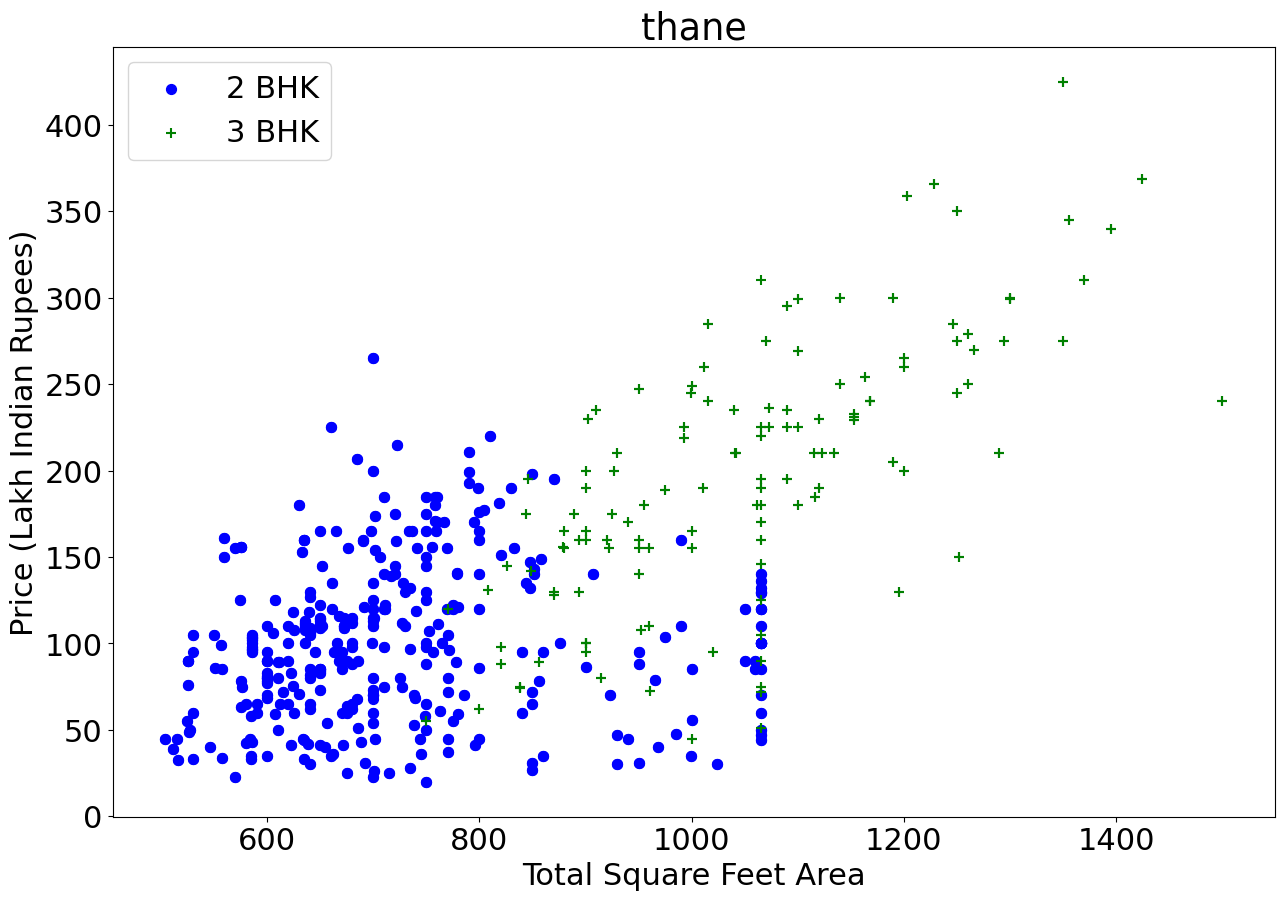

In [778]:
import matplotlib
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['Carpet Area (size)'],bhk2['Amount (lakh)'],color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3['Carpet Area (size)'],bhk3['Amount (lakh)'],marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df,"thane")


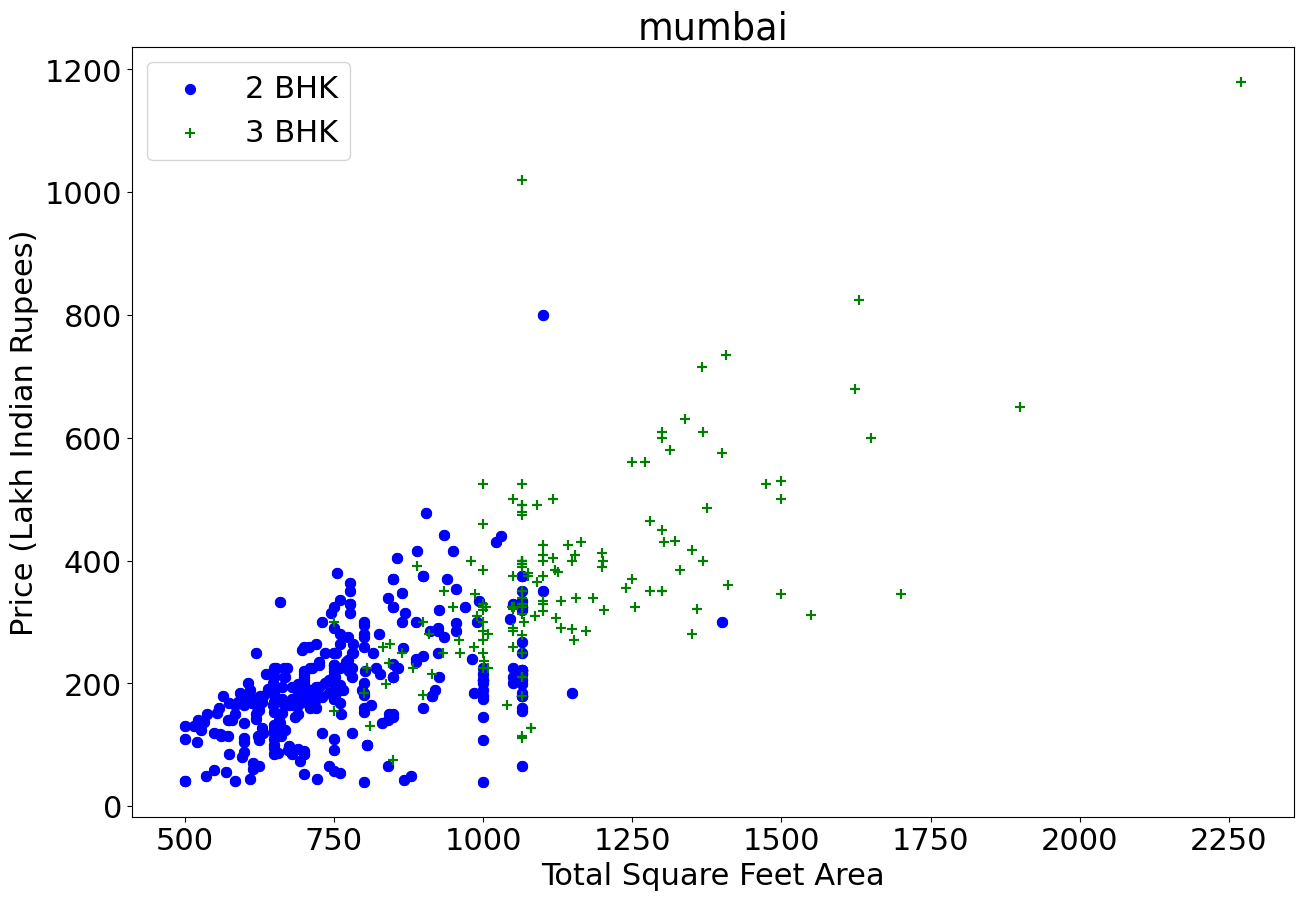

In [779]:
plot_scatter_chart(df,"mumbai")

In [780]:
# Define a function to create sqft bins
def sqft_bin(x, bin_width=100):
    return (x // bin_width) * bin_width

# Create sqft bins
df['sqft_bin'] = df['Carpet Area (size)'].apply(sqft_bin)

# Group by location and sqft_bin
grouped = df.groupby(['location', 'sqft_bin'])

# Iterate through each group and drop 3BHK rows with prices lower than 2BHK rows
indices_to_drop = []
for _, group in grouped:
    bhk_2 = group[group['bhk'] == 2]
    bhk_3 = group[group['bhk'] == 3]
    if not bhk_2.empty and not bhk_3.empty:
        min_2bhk_price = bhk_2['Amount (lakh)'].min()
        for _, row_3bhk in bhk_3.iterrows():
            if row_3bhk['Amount (lakh)'] < min_2bhk_price:
                indices_to_drop.append(row_3bhk.name)
# Drop the identified rows
df.drop(indices_to_drop, inplace=True)

# Drop the sqft_bin column as it's no longer needed
df.drop(columns=['sqft_bin'], inplace=True)

In [781]:
df.shape

(163227, 18)

In [782]:
df.head()

Price (in rupees) location  Floor Transaction   Furnishing facing Society  \
0            6000.00    thane     10      Resale  Unfurnished   East   other   
2           17500.00    thane     10      Resale  Unfurnished   East   other   
3            6047.00    thane      1      Resale  Unfurnished   East   other   
4           18824.00    thane     20      Resale  Unfurnished   West   other   
5            6618.00    thane      2      Resale  Unfurnished   East   other   

   Bathroom Balcony  Carpet Area (size) Carpet Area (unit)  Total floors  \
0         1       2              500.00               sqft            11   
2         2       2              779.00               sqft            29   
3         1       1              413.43               sqft             3   
4         2       2              635.00               sqft            42   
5         1       1              680.00               sqft             7   

   Amount (lakh)  Amount (crore) Parking type  Parking  Super Area (sqft)  bhk  
0          42.00            0.42      Covered        1             700.00    1  
2         140.00            1.40      Covered        1             800.00    2  
3          25.00            0.25      Covered        1             413.43    1  
4         160.00            1.60      Covered        1             849.98    2  
5          45.00            0.45      Covered        1             680.00    1

In [783]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['Price (in rupees)']),
                'std': np.std(bhk_df['Price (in rupees)']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['Price (in rupees)']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [784]:
# df = remove_bhk_outliers(df)
df.shape

(163227, 18)

In [785]:
df.Floor.describe()

count   163227.00
mean         4.52
std          4.63
min         -2.00
25%          2.00
50%          3.00
75%          6.00
max         59.00
Name: Floor, dtype: Float64

In [786]:
df['Bathroom'].describe()

count   163227.00
mean         2.46
std          0.84
min          1.00
25%          2.00
50%          2.00
75%          3.00
max         10.00
Name: Bathroom, dtype: float64

In [787]:
df['Balcony'] = df['Balcony'].astype(int)

In [788]:
df.dtypes

Price (in rupees)     float64
location               object
Floor                   Int64
Transaction            object
Furnishing             object
facing                 object
Society                object
Bathroom                int32
Balcony                 int32
Carpet Area (size)    float64
Carpet Area (unit)     object
Total floors            Int64
Amount (lakh)         float64
Amount (crore)        float64
Parking type           object
Parking                 int32
Super Area (sqft)     float64
bhk                     int32
dtype: object

In [789]:
df['Balcony'].describe()

count   163227.00
mean         2.01
std          0.80
min          1.00
25%          2.00
50%          2.00
75%          2.00
max         10.00
Name: Balcony, dtype: float64

In [790]:
df.rename(columns={'Carpet Area (size)' : 'Carpet Area (sqft)'}, inplace=True)
df.drop(['Carpet Area (unit)'], inplace=True, axis=1)

In [791]:
df['Carpet Area (sqft)'].describe()

count   163227.00
mean      1147.32
std        568.14
min        250.00
25%        900.00
50%       1065.00
75%       1190.00
max      29998.50
Name: Carpet Area (sqft), dtype: float64

Text(0, 0.5, 'Count')

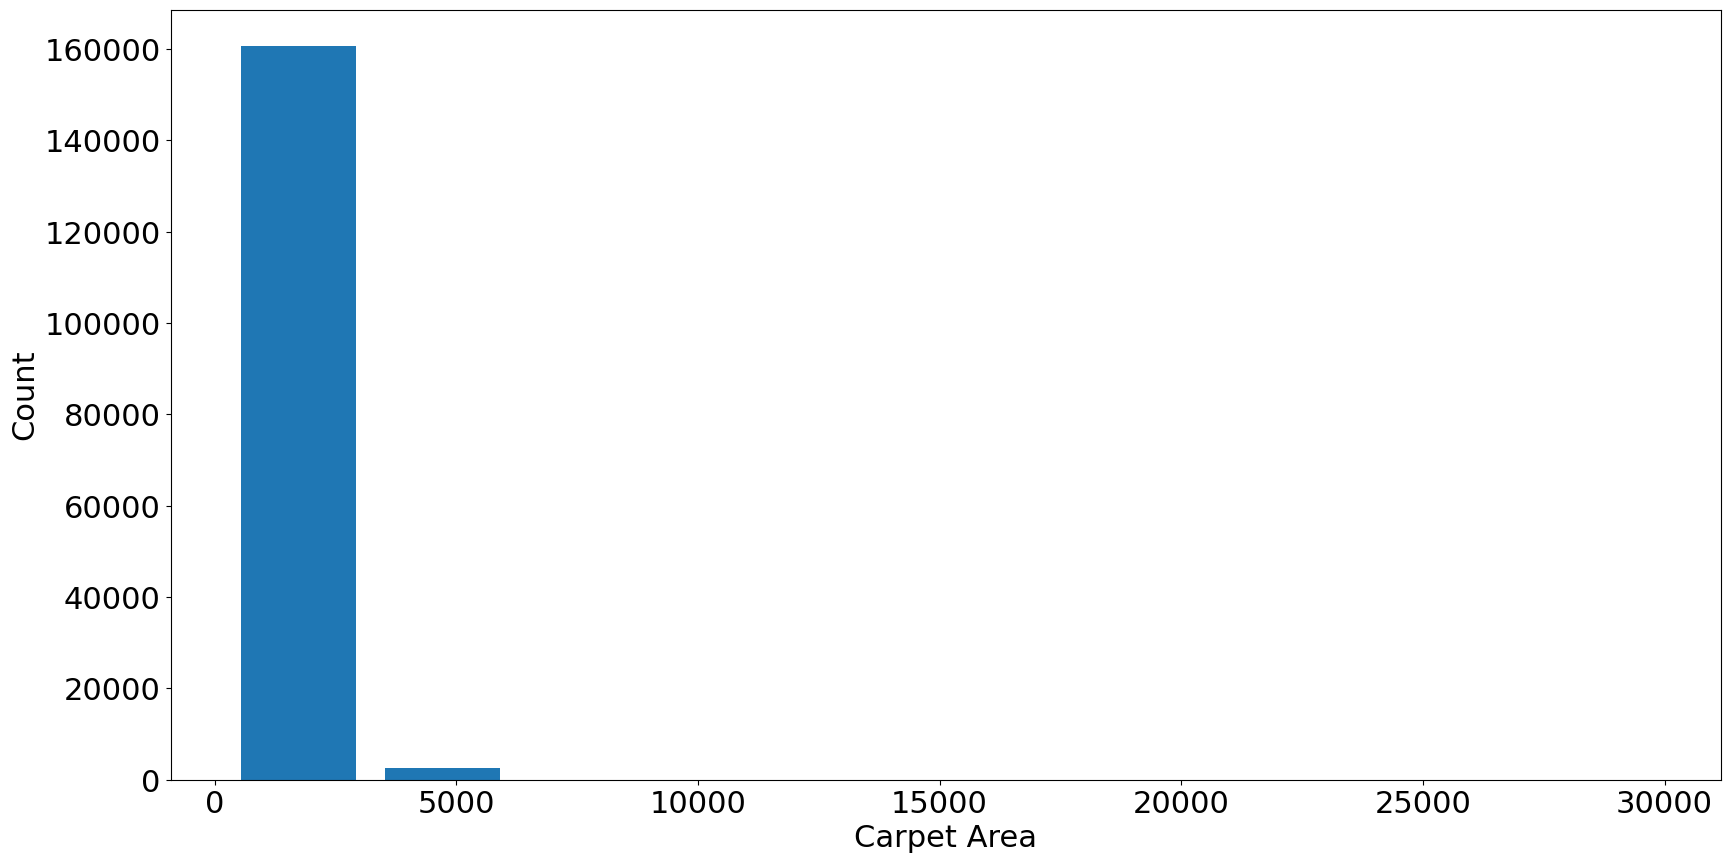

In [792]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 22})
plt.hist(df['Carpet Area (sqft)'],rwidth=0.8)
plt.xlabel("Carpet Area")
plt.ylabel("Count")

In [793]:
df.drop(df[df['Carpet Area (sqft)']>5100].index, inplace=True)

In [794]:
df['Carpet Area (sqft)'].describe()

count   163163.00
mean      1144.91
std        550.60
min        250.00
25%        900.00
50%       1065.00
75%       1185.00
max       5050.00
Name: Carpet Area (sqft), dtype: float64

In [795]:
df.head()

Price (in rupees) location  Floor Transaction   Furnishing facing Society  \
0            6000.00    thane     10      Resale  Unfurnished   East   other   
2           17500.00    thane     10      Resale  Unfurnished   East   other   
3            6047.00    thane      1      Resale  Unfurnished   East   other   
4           18824.00    thane     20      Resale  Unfurnished   West   other   
5            6618.00    thane      2      Resale  Unfurnished   East   other   

   Bathroom  Balcony  Carpet Area (sqft)  Total floors  Amount (lakh)  \
0         1        2              500.00            11          42.00   
2         2        2              779.00            29         140.00   
3         1        1              413.43             3          25.00   
4         2        2              635.00            42         160.00   
5         1        1              680.00             7          45.00   

   Amount (crore) Parking type  Parking  Super Area (sqft)  bhk  
0            0.42      Covered        1             700.00    1  
2            1.40      Covered        1             800.00    2  
3            0.25      Covered        1             413.43    1  
4            1.60      Covered        1             849.98    2  
5            0.45      Covered        1             680.00    1

In [796]:
df['Total floors'].describe()

count   163163.00
mean         8.85
std          7.53
min          1.00
25%          4.00
50%          5.00
75%         12.00
max        150.00
Name: Total floors, dtype: Float64

In [797]:
df[df['Total floors'] > 51].groupby('location').size()

location
ahmedabad         1
bhiwadi           1
goa               1
gurgaon           1
hyderabad         1
mumbai           46
nagpur            2
noida             4
visakhapatnam     1
dtype: int64

Text(0, 0.5, 'Count')

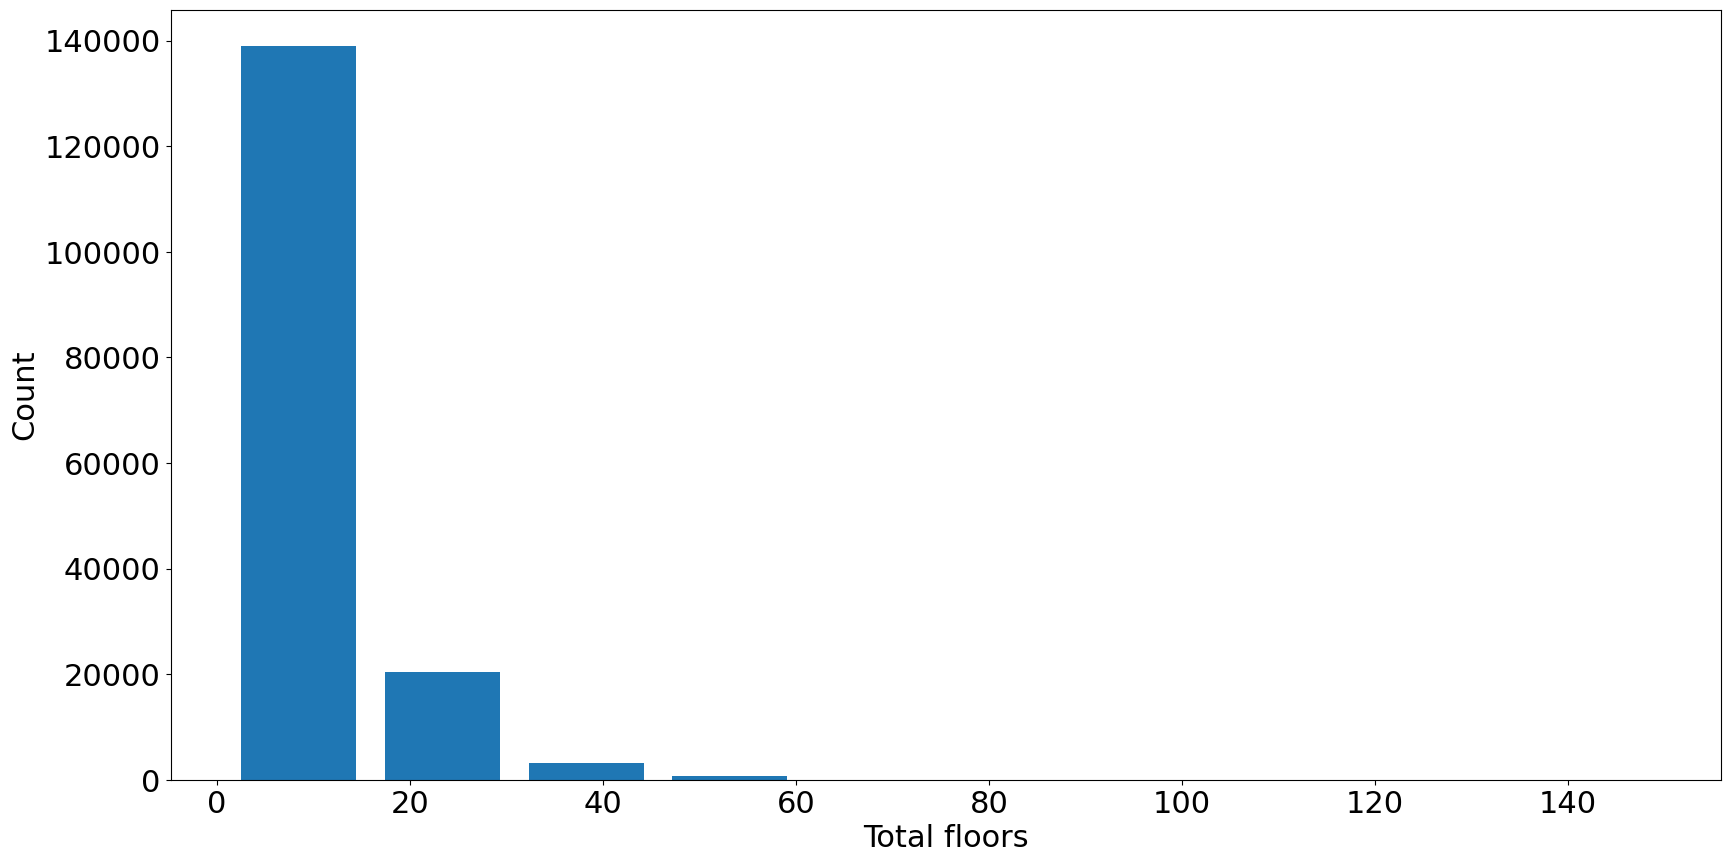

In [798]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 22})
plt.hist(df['Total floors'],rwidth=0.8)
plt.xlabel("Total floors")
plt.ylabel("Count")

In [799]:
df.drop(df[df['Total floors'] > 51].index, inplace=True)

In [800]:
df['Total floors'].describe()

count   163105.00
mean         8.83
std          7.46
min          1.00
25%          4.00
50%          5.00
75%         12.00
max         51.00
Name: Total floors, dtype: Float64

In [801]:
df['Amount (lakh)'].describe()

count   163105.00
mean       118.70
std        121.32
min          2.00
25%         50.00
50%         80.00
75%        145.00
max       2700.00
Name: Amount (lakh), dtype: float64

Text(0, 0.5, 'Count')

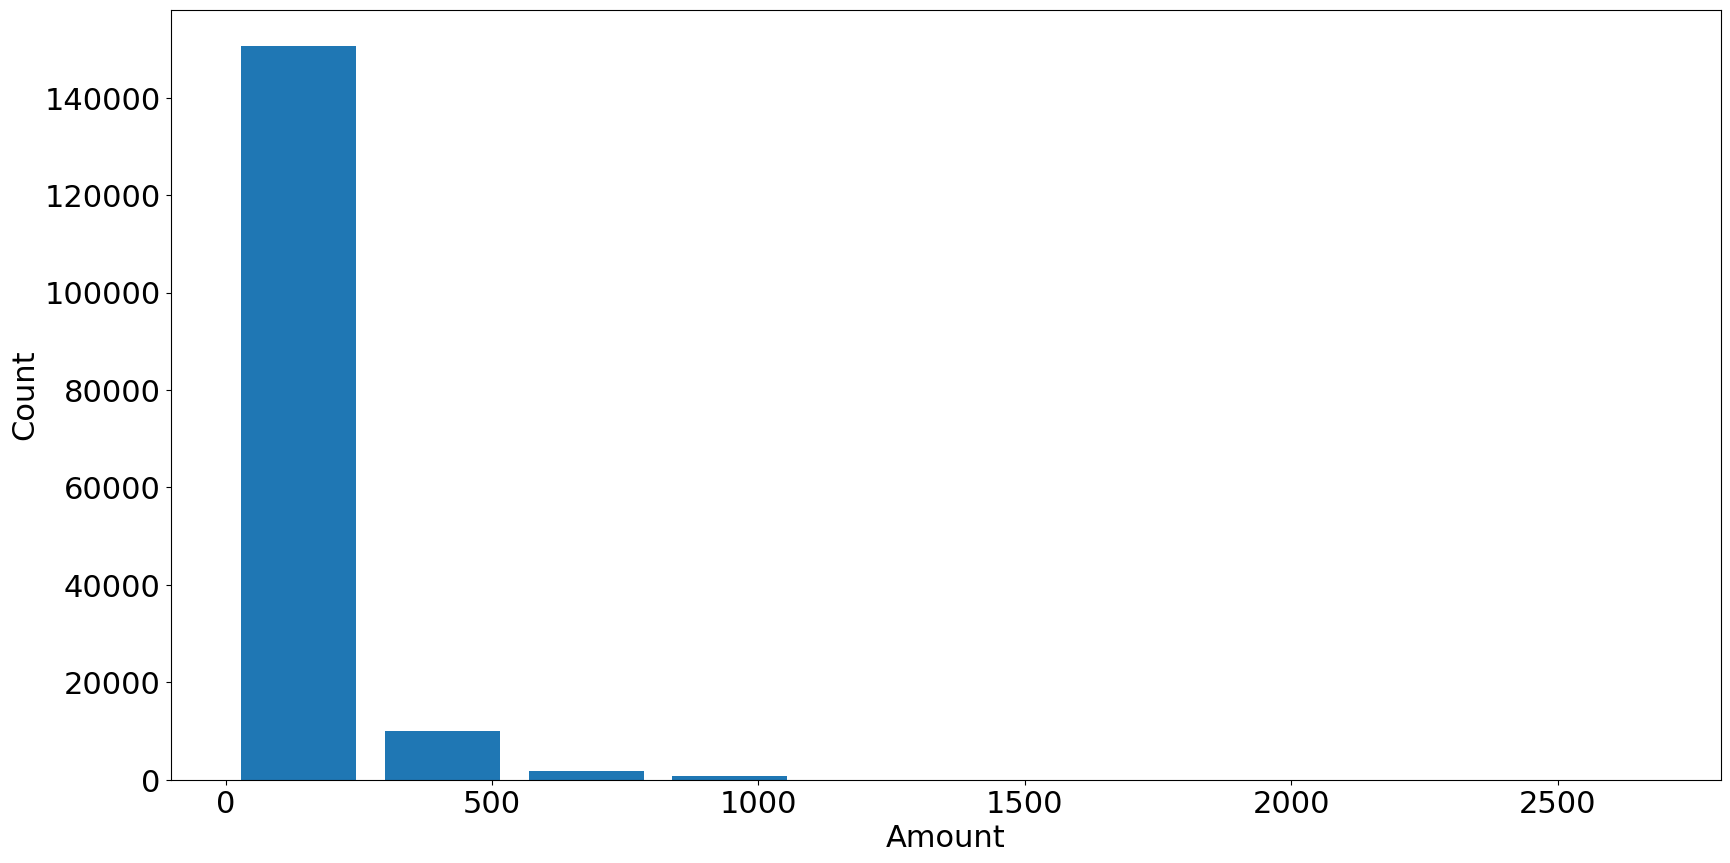

In [802]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 22})
plt.hist(df['Amount (lakh)'],rwidth=0.8)
plt.xlabel("Amount")
plt.ylabel("Count")

In [803]:
df.drop(df[df['Amount (lakh)']<7].index, inplace=True)

In [804]:
df.drop(df[df['Amount (lakh)']>=1100].index, inplace=True)

In [805]:
df['Amount (lakh)'].describe()

count   163007.00
mean       118.04
std        117.07
min          7.00
25%         50.00
50%         80.00
75%        145.00
max       1080.00
Name: Amount (lakh), dtype: float64

In [806]:
df['Parking'].describe()

count   163007.00
mean         2.45
std         21.97
min          1.00
25%          1.00
50%          1.00
75%          1.00
max        999.00
Name: Parking, dtype: float64

Text(0, 0.5, 'Count')

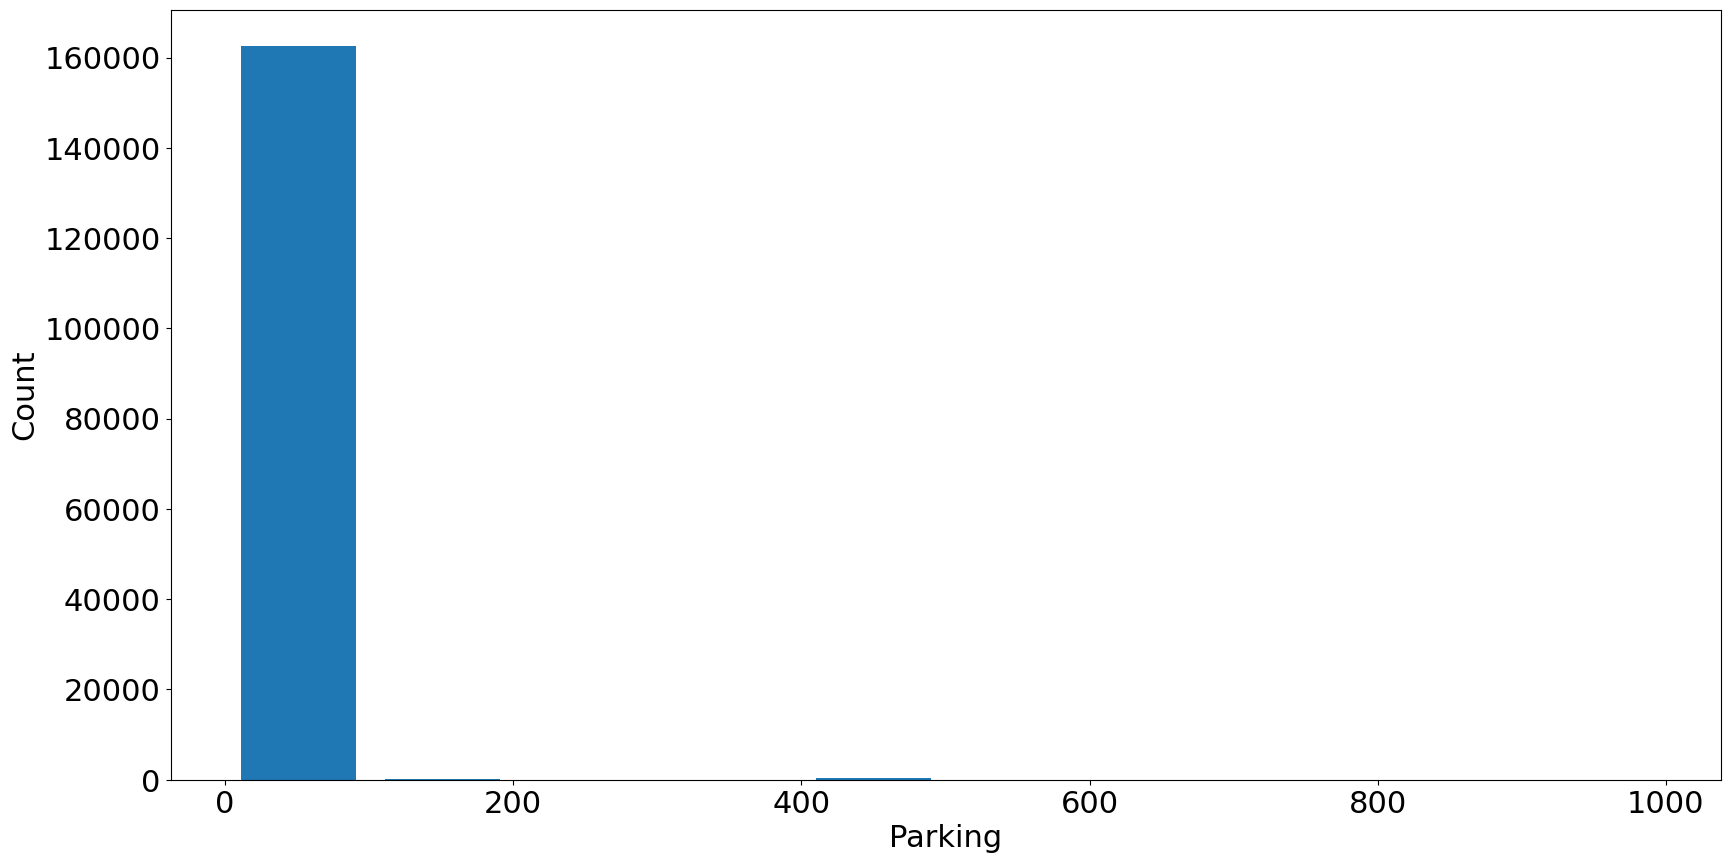

In [807]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 22})
plt.hist(df['Parking'],rwidth=0.8)
plt.xlabel("Parking")
plt.ylabel("Count")

In [808]:
df.drop(df[df['Parking']>200].index, inplace=True)

In [809]:
df.shape

(162556, 17)

In [810]:
df['Super Area (sqft)'].describe()

count   162556.00
mean      1496.78
std        817.14
min        250.00
25%       1035.00
50%       1311.48
75%       1800.03
max      18000.00
Name: Super Area (sqft), dtype: float64

Text(0, 0.5, 'Count')

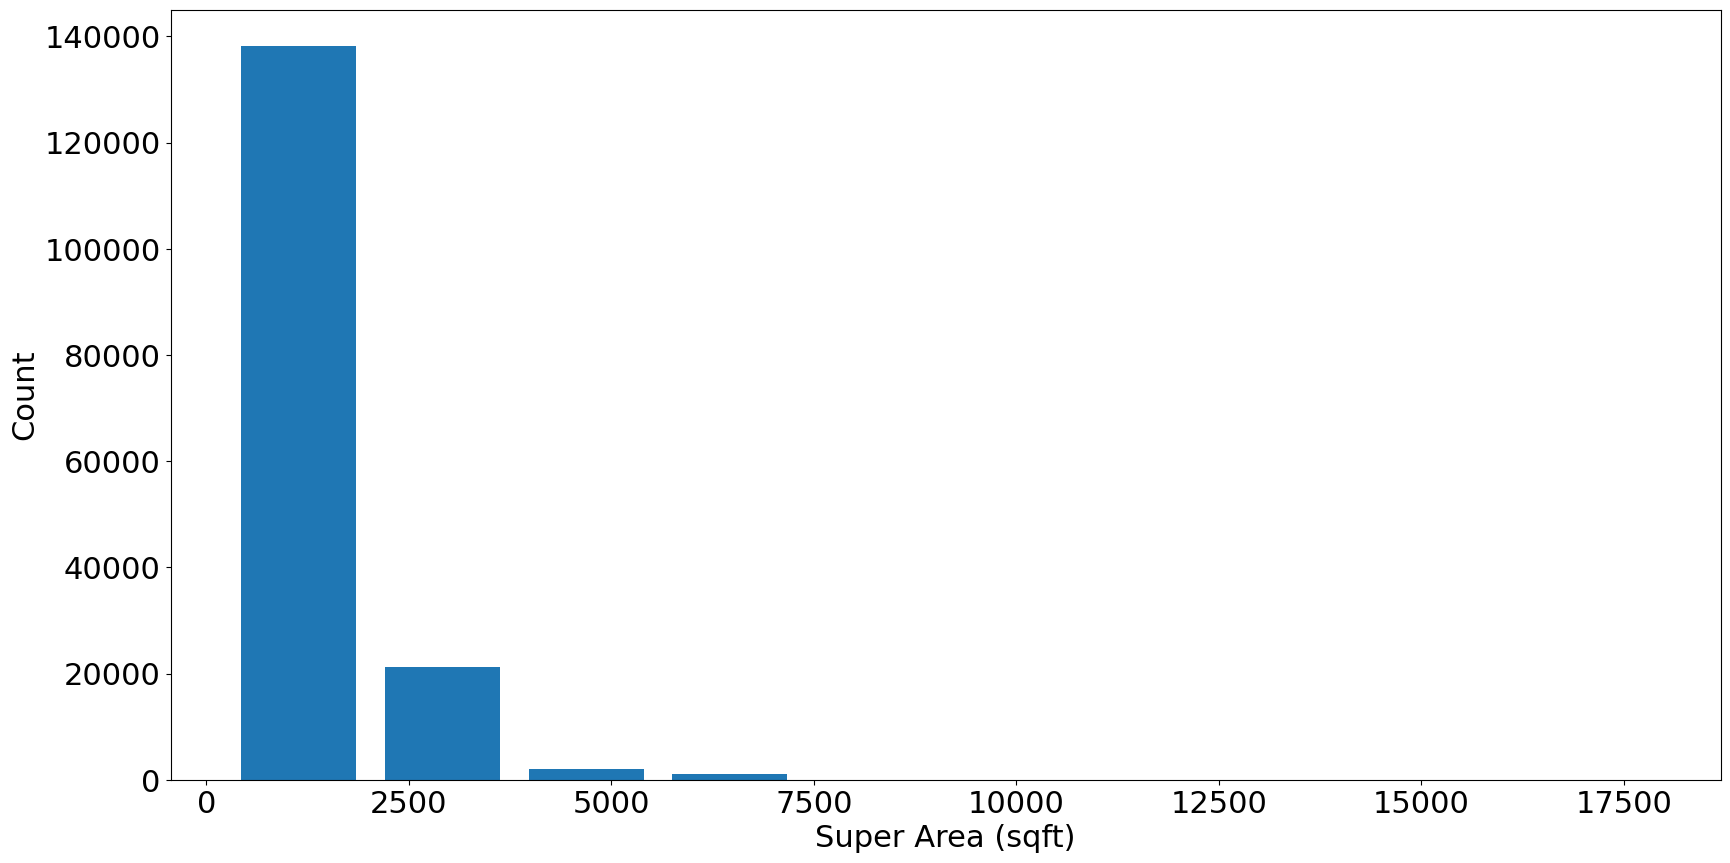

In [811]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 22})
plt.hist(df['Super Area (sqft)'],rwidth=0.8)
plt.xlabel("Super Area (sqft)")
plt.ylabel("Count")

In [812]:
df.drop(df[df['Super Area (sqft)'] < 280].index, inplace=True)

In [813]:
df.drop(df[df['Super Area (sqft)']>7000].index, inplace=True)

In [814]:
df['Super Area (sqft)'].describe()

count   162448.00
mean      1493.66
std        798.52
min        280.00
25%       1035.00
50%       1310.09
75%       1800.03
max       7000.00
Name: Super Area (sqft), dtype: float64

Text(0, 0.5, 'Count')

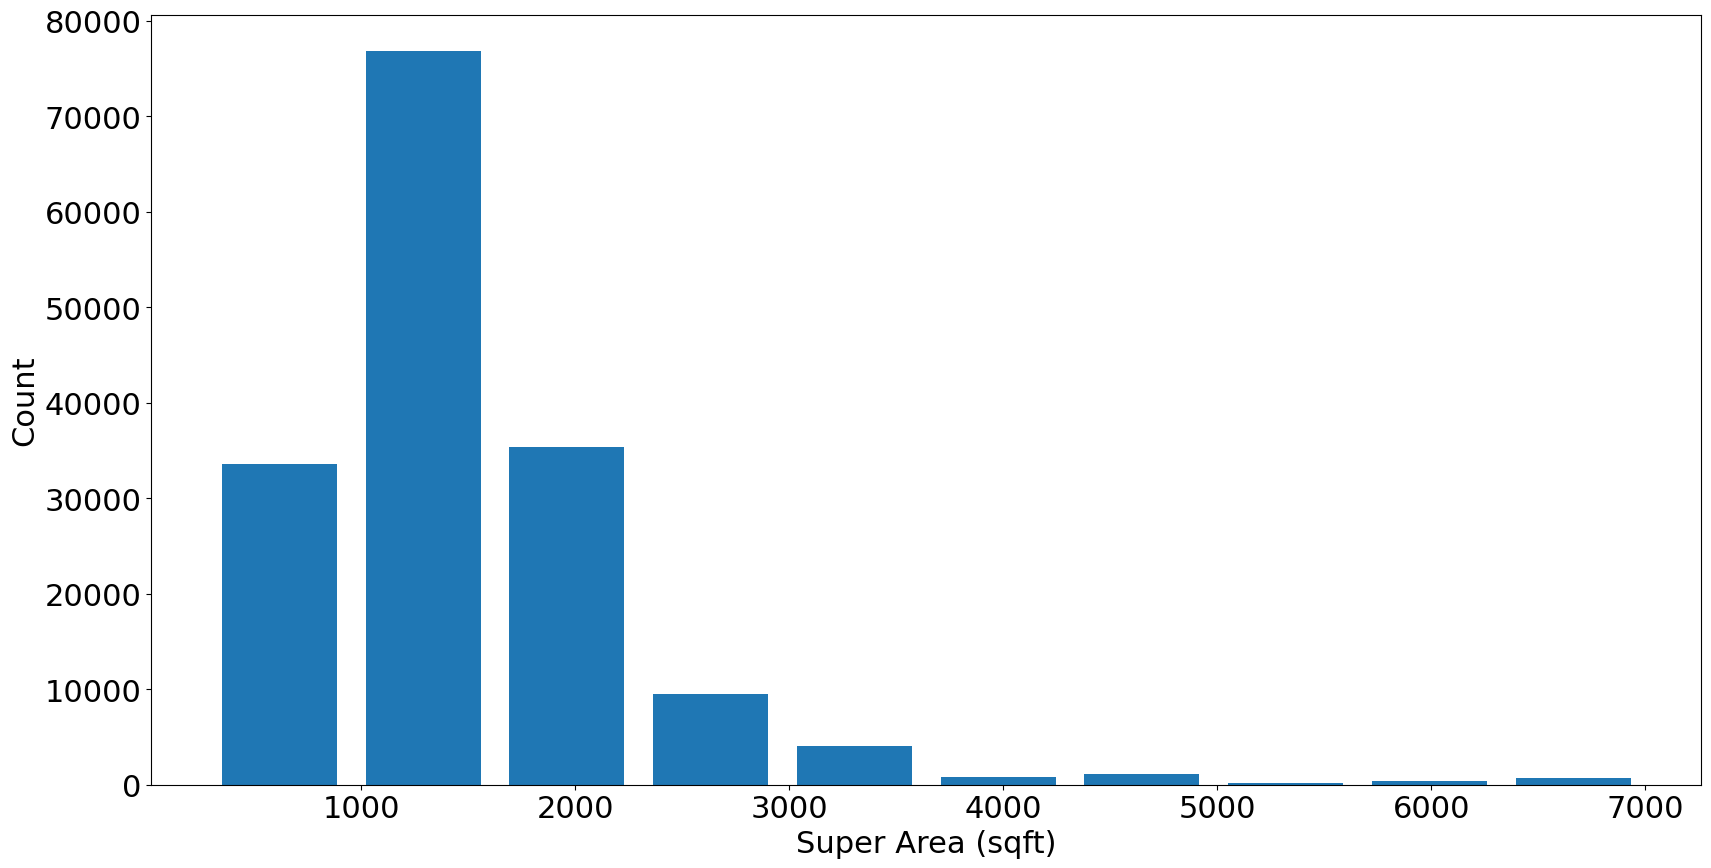

In [815]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 22})
plt.hist(df['Super Area (sqft)'],rwidth=0.8)
plt.xlabel("Super Area (sqft)")
plt.ylabel("Count")

In [816]:
df['bhk'].describe()

count   162448.00
mean         2.60
std          0.77
min          1.00
25%          2.00
50%          3.00
75%          3.00
max         10.00
Name: bhk, dtype: float64

In [817]:
df

Price (in rupees)  location  Floor   Transaction      Furnishing  \
0                 6000.00     thane     10        Resale     Unfurnished   
2                17500.00     thane     10        Resale     Unfurnished   
3                 6047.00     thane      1        Resale     Unfurnished   
4                18824.00     thane     20        Resale     Unfurnished   
5                 6618.00     thane      2        Resale     Unfurnished   
...                   ...       ...    ...           ...             ...   
187526            3225.00  zirakpur      2  New Property  Semi-Furnished   
187527            3274.00  zirakpur      4        Resale     Unfurnished   
187528            4343.00  zirakpur      1        Resale       Furnished   
187529            4231.00  zirakpur      2        Resale  Semi-Furnished   
187530            6162.00  zirakpur      5        Resale  Semi-Furnished   

              facing            Society  Bathroom  Balcony  \
0               East              other         1        2   
2               East              other         2        2   
3               East              other         1        1   
4               West              other         2        2   
5               East              other         1        1   
...              ...                ...       ...      ...   
187526          East  Bollywood Esencia         3        3   
187527  North - East              other         3        2   
187528          East  Bollywood Esencia         3        2   
187529          East              other         2        2   
187530  North - East              other         4        4   

        Carpet Area (sqft)  Total floors  Amount (lakh)  Amount (crore)  \
0                   500.00            11          42.00            0.42   
2                   779.00            29         140.00            1.40   
3                   413.43             3          25.00            0.25   
4                   635.00            42         160.00            1.60   
5                   680.00             7          45.00            0.45   
...                    ...           ...            ...             ...   
187526             1065.00             4          63.00            0.63   
187527             1065.00             6          55.00            0.55   
187528             1250.00             3          76.00            0.76   
187529              709.00             2          30.00            0.30   
187530             1065.00            13         118.00            1.18   

       Parking type  Parking  Super Area (sqft)  bhk  
0           Covered        1             700.00    1  
2           Covered        1             800.00    2  
3           Covered        1             413.43    1  
4           Covered        1             849.98    2  
5           Covered        1             680.00    1  
...             ...      ...                ...  ...  
187526      Covered        1            1953.00    3  
187527      Covered        1            1680.00    3  
187528      Covered        1            1749.94    3  
187529      Covered        1             709.00    2  
187530      Covered        1            1915.00    3  

[162448 rows x 17 columns]

Text(0, 0.5, 'Count')

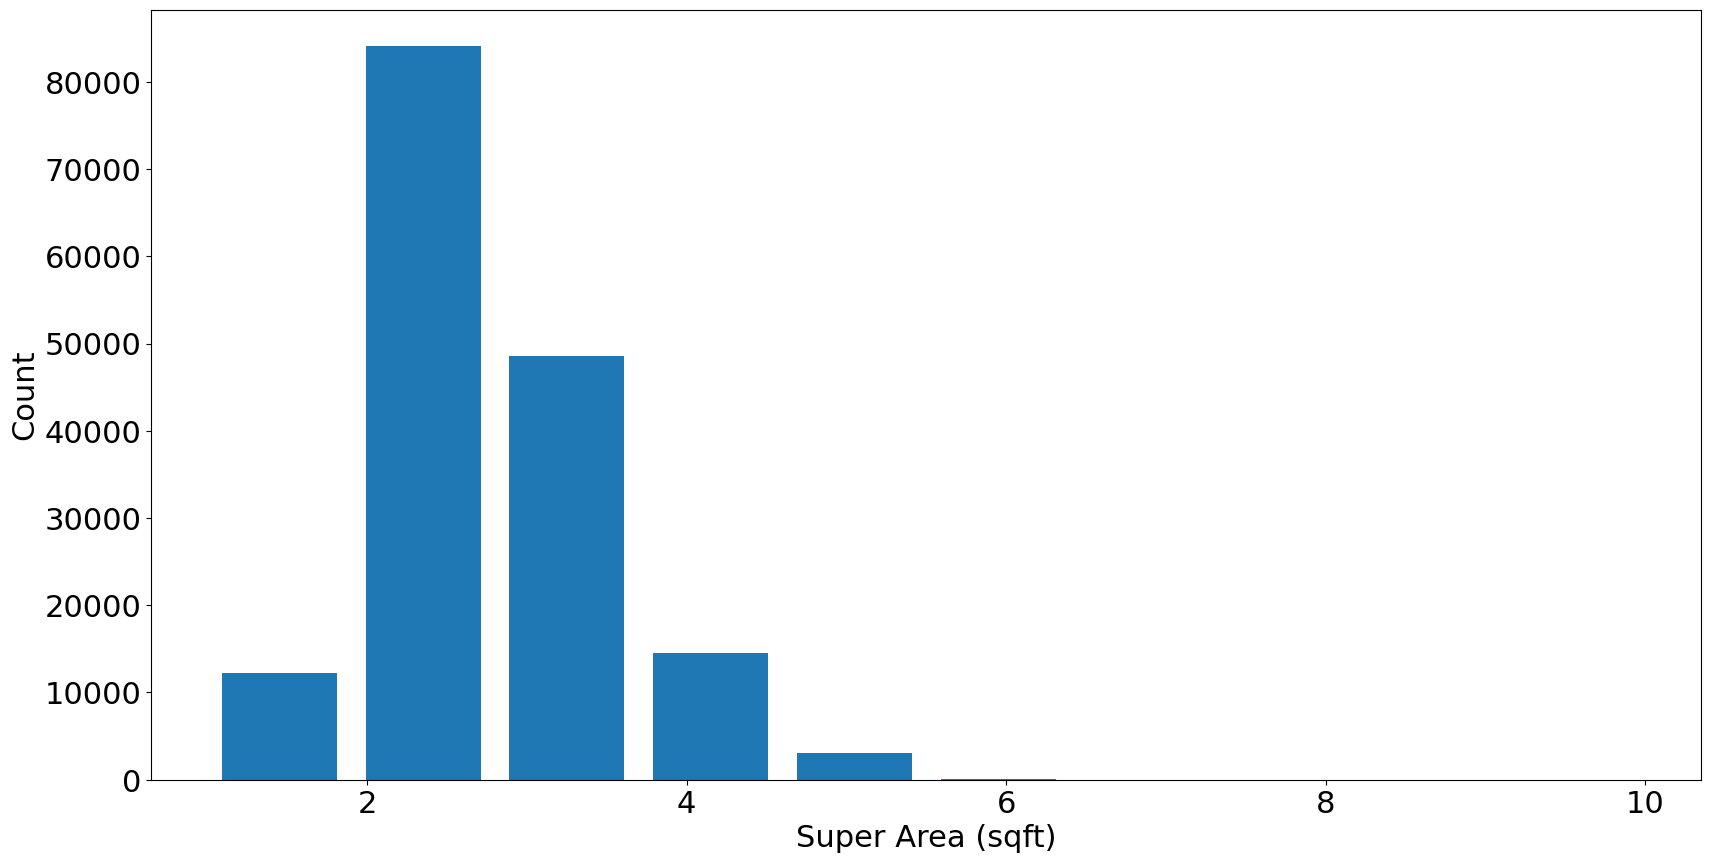

In [818]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 22})
plt.hist(df['Bathroom'],rwidth=0.8)
plt.xlabel("Super Area (sqft)")
plt.ylabel("Count")

In [819]:
df.drop(df[df['Bathroom']>df.bhk+2].index, inplace=True)

In [820]:
df[df['Bathroom']>df.bhk+2]

Empty DataFrame
Columns: [Price (in rupees), location, Floor, Transaction, Furnishing, facing, Society, Bathroom, Balcony, Carpet Area (sqft), Total floors, Amount (lakh), Amount (crore), Parking type, Parking, Super Area (sqft), bhk]
Index: []

In [821]:
df

Price (in rupees)  location  Floor   Transaction      Furnishing  \
0                 6000.00     thane     10        Resale     Unfurnished   
2                17500.00     thane     10        Resale     Unfurnished   
3                 6047.00     thane      1        Resale     Unfurnished   
4                18824.00     thane     20        Resale     Unfurnished   
5                 6618.00     thane      2        Resale     Unfurnished   
...                   ...       ...    ...           ...             ...   
187526            3225.00  zirakpur      2  New Property  Semi-Furnished   
187527            3274.00  zirakpur      4        Resale     Unfurnished   
187528            4343.00  zirakpur      1        Resale       Furnished   
187529            4231.00  zirakpur      2        Resale  Semi-Furnished   
187530            6162.00  zirakpur      5        Resale  Semi-Furnished   

              facing            Society  Bathroom  Balcony  \
0               East              other         1        2   
2               East              other         2        2   
3               East              other         1        1   
4               West              other         2        2   
5               East              other         1        1   
...              ...                ...       ...      ...   
187526          East  Bollywood Esencia         3        3   
187527  North - East              other         3        2   
187528          East  Bollywood Esencia         3        2   
187529          East              other         2        2   
187530  North - East              other         4        4   

        Carpet Area (sqft)  Total floors  Amount (lakh)  Amount (crore)  \
0                   500.00            11          42.00            0.42   
2                   779.00            29         140.00            1.40   
3                   413.43             3          25.00            0.25   
4                   635.00            42         160.00            1.60   
5                   680.00             7          45.00            0.45   
...                    ...           ...            ...             ...   
187526             1065.00             4          63.00            0.63   
187527             1065.00             6          55.00            0.55   
187528             1250.00             3          76.00            0.76   
187529              709.00             2          30.00            0.30   
187530             1065.00            13         118.00            1.18   

       Parking type  Parking  Super Area (sqft)  bhk  
0           Covered        1             700.00    1  
2           Covered        1             800.00    2  
3           Covered        1             413.43    1  
4           Covered        1             849.98    2  
5           Covered        1             680.00    1  
...             ...      ...                ...  ...  
187526      Covered        1            1953.00    3  
187527      Covered        1            1680.00    3  
187528      Covered        1            1749.94    3  
187529      Covered        1             709.00    2  
187530      Covered        1            1915.00    3  

[162436 rows x 17 columns]

In [822]:
df.drop(['facing'],axis=1, inplace=True)

In [823]:
print(len(df.location.unique()))

loc_dummies = pd.get_dummies(df['location']).astype(int)
loc_dummies.drop(['vrindavan'], axis=1, inplace=True)
loc_dummies

81


agra  ahmadnagar  ahmedabad  allahabad  aurangabad  badlapur  \
0          0           0          0          0           0         0   
2          0           0          0          0           0         0   
3          0           0          0          0           0         0   
4          0           0          0          0           0         0   
5          0           0          0          0           0         0   
...      ...         ...        ...        ...         ...       ...   
187526     0           0          0          0           0         0   
187527     0           0          0          0           0         0   
187528     0           0          0          0           0         0   
187529     0           0          0          0           0         0   
187530     0           0          0          0           0         0   

        bangalore  belgaum  bhiwadi  bhiwandi  bhopal  bhubaneswar  \
0               0        0        0         0       0            0   
2               0        0        0         0       0            0   
3               0        0        0         0       0            0   
4               0        0        0         0       0            0   
5               0        0        0         0       0            0   
...           ...      ...      ...       ...     ...          ...   
187526          0        0        0         0       0            0   
187527          0        0        0         0       0            0   
187528          0        0        0         0       0            0   
187529          0        0        0         0       0            0   
187530          0        0        0         0       0            0   

        chandigarh  chennai  coimbatore  dehradun  durgapur  ernakulam  \
0                0        0           0         0         0          0   
2                0        0           0         0         0          0   
3                0        0           0         0         0          0   
4                0        0           0         0         0          0   
5                0        0           0         0         0          0   
...            ...      ...         ...       ...       ...        ...   
187526           0        0           0         0         0          0   
187527           0        0           0         0         0          0   
187528           0        0           0         0         0          0   
187529           0        0           0         0         0          0   
187530           0        0           0         0         0          0   

        faridabad  ghaziabad  goa  greater-noida  guntur  gurgaon  guwahati  \
0               0          0    0              0       0        0         0   
2               0          0    0              0       0        0         0   
3               0          0    0              0       0        0         0   
4               0          0    0              0       0        0         0   
5               0          0    0              0       0        0         0   
...           ...        ...  ...            ...     ...      ...       ...   
187526          0          0    0              0       0        0         0   
187527          0          0    0              0       0        0         0   
187528          0          0    0              0       0        0         0   
187529          0          0    0              0       0        0         0   
187530          0          0    0              0       0        0         0   

        gwalior  haridwar  hyderabad  indore  jabalpur  jaipur  jamshedpur  \
0             0         0          0       0         0       0           0   
2             0         0          0       0         0       0           0   
3             0         0          0       0         0       0           0   
4             0         0          0       0         0       0           0   
5             0         0          0       0         0       0           0

In [824]:
print(len(df['Transaction'].unique()))

trans_dummies = pd.get_dummies(df['Transaction']).astype(int)
trans_dummies.drop(['Other'],inplace=True, axis=1)
trans_dummies

3


New Property  Resale
0                  0       1
2                  0       1
3                  0       1
4                  0       1
5                  0       1
...              ...     ...
187526             1       0
187527             0       1
187528             0       1
187529             0       1
187530             0       1

[162436 rows x 2 columns]

In [825]:
print(len(df['Furnishing'].unique()))

furn_dummies = pd.get_dummies(df['Furnishing']).astype(int)
furn_dummies.drop(['Semi-Furnished'],axis=1, inplace=True)
furn_dummies

3


Furnished  Unfurnished
0               0            1
2               0            1
3               0            1
4               0            1
5               0            1
...           ...          ...
187526          0            0
187527          0            1
187528          1            0
187529          0            0
187530          0            0

[162436 rows x 2 columns]

In [826]:
print(len(df.Society.unique()))

society_dummies = pd.get_dummies(df['Society']).astype(int)
society_dummies.drop(['other'],inplace=True, axis=1)
society_dummies

114


AIG Royal  AROHA  ATS Casa Espana  Aadarsh Apartment  \
0               0      0                0                  0   
2               0      0                0                  0   
3               0      0                0                  0   
4               0      0                0                  0   
5               0      0                0                  0   
...           ...    ...              ...                ...   
187526          0      0                0                  0   
187527          0      0                0                  0   
187528          0      0                0                  0   
187529          0      0                0                  0   
187530          0      0                0                  0   

        Adani Shantigram Waterlily  Ambika La Parisian  Amolik Residency  \
0                                0                   0                 0   
2                                0                   0                 0   
3                                0                   0                 0   
4                                0                   0                 0   
5                                0                   0                 0   
...                            ...                 ...               ...   
187526                           0                   0                 0   
187527                           0                   0                 0   
187528                           0                   0                 0   
187529                           0                   0                 0   
187530                           0                   0                 0   

        Amrapali Castle  Amrapali Golf Homes  Arbi 5th Avenue  Ashiana Anmol  \
0                     0                    0                0              0   
2                     0                    0                0              0   
3                     0                    0                0              0   
4                     0                    0                0              0   
5                     0                    0                0              0   
...                 ...                  ...              ...            ...   
187526                0                    0                0              0   
187527                0                    0                0              0   
187528                0                    0                0              0   
187529                0                    0                0              0   
187530                0                    0                0              0   

        Ashiana Town  Ashok Vihar 2  Ashraya 9  BPTP Astaire Gardens  \
0                  0              0          0                     0   
2                  0              0          0                     0   
3                  0              0          0                     0   
4                  0              0          0                     0   
5                  0              0          0                     0   
...              ...            ...        ...                   ...   
187526             0              0          0                     0   
187527             0              0          0                     0   
187528             0              0          0                     0   
187529             0              0          0                     0   
187530             0              0          0                     0   

        BPTP Princess Park  BPTP Terra  Bengal Peerless Animikha  \
0                        0           0                         0   
2                        0           0                         0   
3                        0           0                         0   
4                        0           0                         0   
5                        0           0                         0   
...                    ...         ...                       ...   
187526                  

In [827]:
# print(len(df['Parking type'].unique()))

# parking_dummies = pd.get_dummies(df['Parking type'], drop_first=True).astype(int)
# parking_dummies

In [828]:
df.reset_index(drop=True, inplace=True)
loc_dummies.reset_index(drop=True, inplace=True)
trans_dummies.reset_index(drop=True, inplace=True)
furn_dummies.reset_index(drop=True, inplace=True)
society_dummies.reset_index(drop=True, inplace=True)
# parking_dummies.reset_index(drop=True, inplace=True)

In [894]:
newdf = pd.concat([df, loc_dummies,
                   trans_dummies, furn_dummies, society_dummies], axis=1)

In [895]:
newdf.drop(['location', 'Transaction', 'Furnishing', 'Society', 'Parking type'], axis=1, inplace=True)
# newdf.drop(['Price (in rupees)'], axis=1, inplace=True)
newdf.drop(['Amount (crore)', 'Total floors', 'Super Area (sqft)'], axis=1, inplace=True)

In [896]:
newdf

Price (in rupees)  Floor  Bathroom  Balcony  Carpet Area (sqft)  \
0                 6000.00     10         1        2              500.00   
1                17500.00     10         2        2              779.00   
2                 6047.00      1         1        1              413.43   
3                18824.00     20         2        2              635.00   
4                 6618.00      2         1        1              680.00   
...                   ...    ...       ...      ...                 ...   
162431            3225.00      2         3        3             1065.00   
162432            3274.00      4         3        2             1065.00   
162433            4343.00      1         3        2             1250.00   
162434            4231.00      2         2        2              709.00   
162435            6162.00      5         4        4             1065.00   

        Amount (lakh)  Parking  bhk  agra  ahmadnagar  ahmedabad  allahabad  \
0               42.00        1    1     0           0          0          0   
1              140.00        1    2     0           0          0          0   
2               25.00        1    1     0           0          0          0   
3              160.00        1    2     0           0          0          0   
4               45.00        1    1     0           0          0          0   
...               ...      ...  ...   ...         ...        ...        ...   
162431          63.00        1    3     0           0          0          0   
162432          55.00        1    3     0           0          0          0   
162433          76.00        1    3     0           0          0          0   
162434          30.00        1    2     0           0          0          0   
162435         118.00        1    3     0           0          0          0   

        aurangabad  badlapur  bangalore  belgaum  bhiwadi  bhiwandi  bhopal  \
0                0         0          0        0        0         0       0   
1                0         0          0        0        0         0       0   
2                0         0          0        0        0         0       0   
3                0         0          0        0        0         0       0   
4                0         0          0        0        0         0       0   
...            ...       ...        ...      ...      ...       ...     ...   
162431           0         0          0        0        0         0       0   
162432           0         0          0        0        0         0       0   
162433           0         0          0        0        0         0       0   
162434           0         0          0        0        0         0       0   
162435           0         0          0        0        0         0       0   

        bhubaneswar  chandigarh  chennai  coimbatore  dehradun  durgapur  \
0                 0           0        0           0         0         0   
1                 0           0        0           0         0         0   
2                 0           0        0           0         0         0   
3                 0           0        0           0         0         0   
4                 0           0        0           0         0         0   
...             ...         ...      ...         ...       ...       ...   
162431            0           0        0           0         0         0   
162432            0           0        0           0         0         0   
162433            0           0        0           0         0         0   
162434            0           0        0           0         0         0   
162435            0           0        0           0         0         0   

        ernakulam  faridabad  ghaziabad  goa  greater-noida  guntur  gurgaon  \
0               0          0          0    0              0       0        0   
1               0          0          0    0              0       0        0   
2               0          0          0    0            

In [897]:
newdf.dtypes

Price (in rupees)          float64
Floor                        Int64
Bathroom                     int32
Balcony                      int32
Carpet Area (sqft)         float64
                            ...   
Twin Celestial               int32
Urban Heights                int32
Vihaan Vista                 int32
kamnath sepal residency      int32
orchid petals                int32
Length: 205, dtype: object

In [898]:
newdf.isna().sum()

Price (in rupees)          0
Floor                      0
Bathroom                   0
Balcony                    0
Carpet Area (sqft)         0
                          ..
Twin Celestial             0
Urban Heights              0
Vihaan Vista               0
kamnath sepal residency    0
orchid petals              0
Length: 205, dtype: int64

## Machine Learning

In [938]:
newdf.shape

(162436, 205)

In [939]:
X = newdf.drop(['Amount (lakh)'], axis=1)
y = newdf['Amount (lakh)']

In [940]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)    

In [941]:
len(X_train), len(X_test)

(129948, 32488)

In [903]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [904]:
lr.score(X_test,y_test)

0.9244718600634314

In [840]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.92169049, 0.92713098, 0.92212005, 0.92436964, 0.92553227])

In [841]:
np.mean(cross_val_score(LinearRegression(), X, y, cv=cv))

0.9241686863693876

In [905]:
X_train

Price (in rupees)  Floor  Bathroom  Balcony  Carpet Area (sqft)  \
116812           11278.00      1         3        2             1197.00   
84371             6182.00      2         2        1              890.00   
72331            11056.00      3         4        1             3599.86   
76215             4000.00      2         2        2             1065.00   
108006           12182.00      8         3        4             1950.00   
...                   ...    ...       ...      ...                 ...   
113215           11167.00      8         3        4             2100.00   
12087             4335.00      1         2        2              839.58   
5083              6047.00     16         5        1             4734.00   
31832             7456.00      3         2        2             1065.00   
126923            3360.00      4         2        2             1065.00   

        Parking  bhk  agra  ahmadnagar  ahmedabad  allahabad  aurangabad  \
116812        1    3     0           0          0          0           0   
84371         1    2     0           0          0          0           0   
72331         2    4     0           0          0          0           0   
76215         1    3     0           0          0          0           0   
108006        1    4     0           0          0          0           0   
...         ...  ...   ...         ...        ...        ...         ...   
113215        1    4     0           0          0          0           0   
12087         1    2     0           0          1          0           0   
5083          2    5     0           0          1          0           0   
31832         1    2     0           0          0          0           0   
126923        1    2     1           0          0          0           0   

        badlapur  bangalore  belgaum  bhiwadi  bhiwandi  bhopal  bhubaneswar  \
116812         0          0        0        0         0       0            0   
84371          0          0        0        0         0       0            0   
72331          0          0        0        0         0       0            0   
76215          0          0        0        0         0       0            0   
108006         0          0        0        0         0       0            0   
...          ...        ...      ...      ...       ...     ...          ...   
113215         0          0        0        0         0       0            0   
12087          0          0        0        0         0       0            0   
5083           0          0        0        0         0       0            0   
31832          0          1        0        0         0       0            0   
126923         0          0        0        0         0       0            0   

        chandigarh  chennai  coimbatore  dehradun  durgapur  ernakulam  \
116812           0        0           0         0         0          0   
84371            0        0           0         0         0          0   
72331            0        0           0         0         0          0   
76215            0        0           0         0         0          0   
108006           0        0           0         0         0          0   
...            ...      ...         ...       ...       ...        ...   
113215           0        0           0         0         0          0   
12087            0        0           0         0         0          0   
5083             0        0           0         0         0          0   
31832            0        0           0         0         0          0   
126923           0        0           0         0         0          0   

        faridabad  ghaziabad  goa  greater-noida  guntur  gurgaon  guwahati  \
116812          0          0    0              0       0        0         0   
84371           0          0    0              0       0        0         0   
72331           0          0    0              0       0        0         0   
76215           0          0

In [906]:
def predict_price(model, pr, floor, bathroom, balcony, carpet, 
                  parking, bhk, location, transaction, furnish, society):
    loc_index = np.where(X.columns==location)[0][0]
    tran_index = np.where(X.columns==transaction)[0][0]
    fur_index = np.where(X.columns==furnish)[0][0]
    soc_index = np.where(X.columns==society)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = pr
    x[1] = floor
    x[2] = bathroom
    x[3] = balcony
    x[4] = carpet
    x[5] = parking
    x[6] = bhk
 
    if loc_index >= 0:
        x[loc_index] = 1
    if tran_index >= 0:
        x[tran_index] = 1
    if fur_index >= 0:
        x[fur_index] = 1
    if soc_index >= 0:
        x[soc_index] = 1
    
    return model.predict([x])

In [907]:
lr.predict(X_test)[:10]

array([ 22.        ,  72.81785036, -31.19991562, 167.70332925,
        72.81785036, 318.75900083,  61.3830897 ,  29.36583495,
       166.9735873 , 635.25063516])

In [908]:
y_test[:10]

90952     22.00
18544     60.00
9662      23.00
131412   320.00
22492     60.00
82061    500.00
81148     48.00
74991     40.50
68024    140.00
105341   750.00
Name: Amount (lakh), dtype: float64

In [847]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train, y_train)

ElasticNet()

In [848]:
model.score(X_test, y_test)

0.8682987112699695

In [909]:
predict_price(model, 6000, 2, 1, 2, 700, 5, 2, "thane", "New Property", 
              "Furnished", "Sushma Grande")

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but BaggingRegressor was fitted with feature names



array([162.9])

In [910]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9836873649735978

In [912]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9657218069613497

In [913]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9822626154474186

In [914]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9555736273860039

In [942]:
finalmodel = BaggingRegressor()
finalmodel.fit(X_train, y_train)

BaggingRegressor()

In [943]:
finalmodel.score(X_test, y_test)

0.9830774716491293

In [944]:
pd.set_option('display.max_columns', 500)
X_test

Price (in rupees)  Floor  Bathroom  Balcony  Carpet Area (sqft)  \
137494           10586.00      1         1        1              462.88   
76771             7222.00      3         4        3             1065.00   
145335            4267.00      5         1        2              750.00   
42416            11962.00      3         3        2             1065.00   
115069            9750.00      3         2        3             1350.00   
...                   ...    ...       ...      ...                 ...   
23600             7456.00      3         2        2             1065.00   
149969            9730.00     12         4        4             1448.00   
123419            4700.00      4         2        1              900.00   
89105             7666.00     12         2        2             1065.00   
92030             3676.00      4         1        2              680.00   

        Parking  bhk  agra  ahmadnagar  ahmedabad  allahabad  aurangabad  \
137494        1    1     0           0          0          0           0   
76771         1    4     0           0          0          0           0   
145335        1    2     0           0          0          0           0   
42416         2    3     0           0          0          0           0   
115069        1    3     0           0          0          0           0   
...         ...  ...   ...         ...        ...        ...         ...   
23600         1    2     0           0          0          0           0   
149969        1    3     0           0          0          0           0   
123419        1    2     0           0          0          0           0   
89105         1    3     0           0          0          0           0   
92030         1    2     0           0          0          0           0   

        badlapur  bangalore  belgaum  bhiwadi  bhiwandi  bhopal  bhubaneswar  \
137494         0          0        0        0         0       0            0   
76771          0          0        0        0         0       0            0   
145335         0          0        0        0         0       0            0   
42416          0          0        0        0         0       0            0   
115069         0          0        0        0         0       0            0   
...          ...        ...      ...      ...       ...     ...          ...   
23600          0          1        0        0         0       0            0   
149969         0          0        0        0         0       0            0   
123419         0          0        0        0         0       0            0   
89105          0          0        0        0         0       0            0   
92030          0          0        0        0         0       0            0   

        chandigarh  chennai  coimbatore  dehradun  durgapur  ernakulam  \
137494           0        0           0         0         0          0   
76771            0        0           0         0         0          0   
145335           0        0           0         0         0          0   
42416            0        1           0         0         0          0   
115069           0        0           0         0         0          0   
...            ...      ...         ...       ...       ...        ...   
23600            0        0           0         0         0          0   
149969           0        0           0         0         0          0   
123419           0        0           0         0         0          0   
89105            0        0           0         0         0          0   
92030            0        0           0         0         0          0   

        faridabad  ghaziabad  goa  greater-noida  guntur  gurgaon  guwahati  \
137494          0          0    1              0       0        0         0   
76771           0          0    0              0       0        0         0   
145335          0          0    0              0       0        0         0   
42416           0          0

In [945]:
y_test

137494    49.00
76771    195.00
145335    32.00
42416    189.00
115069   156.00
          ...  
23600     85.00
149969   180.00
123419    47.00
89105    110.00
92030     25.00
Name: Amount (lakh), Length: 32488, dtype: float64

In [946]:
predict_price(finalmodel,  9750, 3, 2, 3, 1350, 1, 3, "new-delhi", "Resale", 
              "Unfurnished", "DDA Sanskriti Apartments")

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but BaggingRegressor was fitted with feature names



array([160.])

In [947]:
predict = finalmodel.predict(X_test)
predict[:15]

array([ 62.53, 195.  ,  36.2 , 189.  , 156.  ,  41.3 ,  64.  , 105.  ,
        85.  ,  36.2 ,  65.  , 225.  ,  72.82,  85.  ,  28.5 ])

In [948]:
y_test[:15]

137494    49.00
76771    195.00
145335    32.00
42416    189.00
115069   156.00
155213    40.50
33307     64.00
10086    105.00
114062    85.00
151173    35.00
6130      65.00
85079    225.00
132411    83.40
61684     85.00
124840    24.00
Name: Amount (lakh), dtype: float64

In [949]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predict))
rmse

15.389515556842733

In [950]:
import plotly.figure_factory as ff
ff.create_distplot([newdf['Amount (lakh)']], ['Amount'], show_hist=True, show_rug=False)

In [951]:
# from sklearn.decomposition import PCA
# pca = PCA(0.98)
# X_pca = pca.fit_transform(X)
# X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca,y,test_size=0.2)    

In [953]:
import pickle
with open('model//house_prices.pickle','wb') as f:
    pickle.dump(finalmodel,f)

In [959]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [956]:
newdf.to_csv("preprocessd_houseprice.csv")